In [1]:
# import pycoexp.tasks as task
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import simulation as sim
import plot as pl
from itertools import combinations
import utilities as u
import glob
import os
sns.set_context('talk')

In [14]:
dfPN = sim.scan_and_optimize(parameterName='temperature',
                            filepath_CPSmodel='../models/submission/NAD_biosynthesis_P_Keq_min_ratio.cps',
                            foldername='./results/submission/min_ratio_2_P/', T0=50, T1=90, n=200, steps=5)
dfPN['objective'] = 'min_ratio'
dfPN.to_csv('../data/new_PN_Keq_min_ratio_1_2_P.csv', sep='\t')

In [15]:
df = pd.concat((pd.read_csv('../data/new_PN_Keq_min_ratio_1_1.csv', sep='\t'),
    pd.read_csv('../data/new_PN_Keq_min_ratio_1_2.csv', sep='\t'),
    pd.read_csv('../data/new_PN_Keq_min_ratio_1_2_P.csv', sep='\t'),
    pd.read_csv('../data/new_PN_Keq_min_ratio_1_3.csv', sep='\t')))
df.to_csv('../data/new_PN_Keq_min_ratio_1_123.csv', sep='\t')


In [41]:
dfPN = sim.scan_and_optimize(parameterName='temperature',
                             filepath_CPSmodel='../models/submission/NAD_biosynthesis_PN_Keq_max_NAD.cps',
                             foldername='./results/submission/max_NAD1/', T0=50, T1=90, n=1000, steps=5)


In [5]:
dfPN = sim.scan_and_optimize(parameterName='temperature',
                             filepath_CPSmodel='../models/submission/NAD_biosynthesis_PN_Keq_SIRT_min_ATP.cps',
                             foldername='./results/submission/min_ATP/', T0=50, T1=90, n=1000, steps=5)

In [11]:
# dfPN.to_csv('../data/new_PN_Keq_min_ATP_1.csv', sep='\t')
dfPN = pd.read_csv('../data/new_PN_Keq_min_ratio_1.csv', sep='\t')


In [2]:
df1 = pd.read_csv('../data/new_PN_Keq_min_ratio_1_123.csv', sep='\t')
df1.loc[(df1.ET_NAMPT < 1), 'pathway'] = 'PNCA'
df1.loc[(df1.ET_PNCA < 1), 'pathway'] = 'NAMPT'
df1 = df1.rename(columns={'Temperature': 'temperature'})#.set_index('temperature')
dfP = df1[df1.pathway=='PNCA']
dfN = df1[df1.pathway=='NAMPT']


In [3]:
# sim.getnewCPS(filepath_CPSmodel='../models/submission/NAD_biosynthesis_PN_Keq_min_ratio.cps', 
# Optdf=dfP.drop(['Sol', 'objective', 'pathway'], axis=1), foldername='./tmp_opt/optimized/PNCA')

sim.getnewCPS(filepath_CPSmodel='../models/submission/NAD_biosynthesis_PN_Keq_min_ratio.cps',
              Optdf=dfN.drop(['Sol', 'objective', 'pathway'], axis=1), foldername='./tmp_opt/optimized/NAMPT')


In [6]:
import os
os.path.join('./tmp_opt/optimized/PNCA', f'optimized_{0}.cps')


'./tmp_opt/optimized/PNCA\\optimized_0.cps'

In [2]:
conc, flux, temp = [], [], []
for file in glob.glob('./tmp_opt/optimized/PNCA/*.cps'):
    dm = sim.task.init_dataModel(file)
    m = dm.getModel()
    mv = m.getModelValue('temperature')
    try:
        C, F = sim.task.steadystate(filepath_CPSmodel=file)
        conc.append(C)
        flux.append(F)
        temp.append(mv.getInitialValue())
    except AssertionError:
        print(file)
        pass
conc = pd.DataFrame(conc)
conc['temperature'] = temp
flux = pd.DataFrame(flux)
flux['temperature'] = temp



In [8]:
conc['pathway'] = 'PNCA'
flux['pathway'] = 'PNCA'

In [10]:
conc.to_csv('../data/new_Conc_min_ratio_PNCA.csv', sep='\t', index=False)
flux.to_csv('../data/new_Flux_min_ratio_PNCA.csv', sep='\t', index=False)


In [2]:
concN, fluxN, temp = [], [], []
for file in glob.glob('./tmp_opt/optimized/NAMPT/*.cps'):
    dm = sim.task.init_dataModel(file)
    m = dm.getModel()
    mv = m.getModelValue('temperature')
    try:
        C, F = sim.task.steadystate(filepath_CPSmodel=file)
        concN.append(C)
        fluxN.append(F)
        temp.append(mv.getInitialValue())
    except AssertionError:
        print(file)
        pass
concN = pd.DataFrame(concN)
concN['temperature'] = temp
fluxN = pd.DataFrame(fluxN)
fluxN['temperature'] = temp

concN['pathway'] = 'NAMPT'
fluxN['pathway'] = 'NAMPT'


./tmp_opt/optimized/NAMPT\optimized_1003.cps
./tmp_opt/optimized/NAMPT\optimized_1016.cps
./tmp_opt/optimized/NAMPT\optimized_1019.cps
./tmp_opt/optimized/NAMPT\optimized_102.cps
./tmp_opt/optimized/NAMPT\optimized_1020.cps
./tmp_opt/optimized/NAMPT\optimized_1024.cps
./tmp_opt/optimized/NAMPT\optimized_1027.cps
./tmp_opt/optimized/NAMPT\optimized_1031.cps
./tmp_opt/optimized/NAMPT\optimized_1033.cps
./tmp_opt/optimized/NAMPT\optimized_1035.cps
./tmp_opt/optimized/NAMPT\optimized_1037.cps
./tmp_opt/optimized/NAMPT\optimized_1043.cps
./tmp_opt/optimized/NAMPT\optimized_105.cps
./tmp_opt/optimized/NAMPT\optimized_1059.cps
./tmp_opt/optimized/NAMPT\optimized_1065.cps
./tmp_opt/optimized/NAMPT\optimized_1077.cps
./tmp_opt/optimized/NAMPT\optimized_1087.cps
./tmp_opt/optimized/NAMPT\optimized_11.cps
./tmp_opt/optimized/NAMPT\optimized_1102.cps
./tmp_opt/optimized/NAMPT\optimized_1107.cps
./tmp_opt/optimized/NAMPT\optimized_1108.cps
./tmp_opt/optimized/NAMPT\optimized_1113.cps
./tmp_opt/opti

In [4]:
concN.to_csv('../data/new_Conc_min_ratio_NAMPT.csv', sep='\t', index=False)
fluxN.to_csv('../data/new_Flux_min_ratio_NAMPT.csv', sep='\t', index=False)


In [6]:
concP = pd.read_csv('../data/new_Conc_min_ratio_PNCA.csv', sep='\t')
fluxP = pd.read_csv('../data/new_Flux_min_ratio_PNCA.csv', sep='\t')

concN = pd.read_csv('../data/new_Conc_min_ratio_NAMPT.csv', sep='\t')
fluxN = pd.read_csv('../data/new_Flux_min_ratio_NAMPT.csv', sep='\t')


In [10]:
conc = pd.concat((concP, concN))
conc['objective'] = 'min_ratio'
conc.to_csv('../data/new_Conc_min_ratio_1_123.csv', sep='\t', index=False)

flux = pd.concat((fluxP, fluxN))
flux['objective'] = 'min_ratio'
flux.to_csv('../data/new_Flux_min_ratio_1_123.csv', sep='\t', index=False)

<AxesSubplot:xlabel='temperature'>

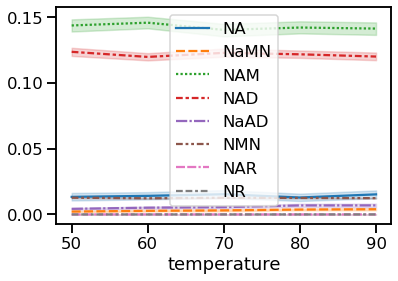

In [11]:
sns.lineplot(data=u.dropConstantCol(conc.set_index('temperature')))


In [68]:
mv.getInitialValue()
# file

90.0

In [29]:
# df1.reset_index().rename(columns={'Temperature':'temperature'})
F = sim.calculateATPconsFlux(F).reset_index()
F.pathway = F.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})
cols = ['PNCA', 'NAPRT', 'NMNAT1-NaMN', 'NADS', 'SIRT', 'NAMPT', 'NMNAT1-NMN',
        'NT5-NaMN', 'NT5-NMN', 'NRK1-NMN', 'PNP-NR', 'NRK1-NaMN', 'PNP-NAR',
        'NMN thermolysis', 'NaMN thermolysis', 'NAR thermolysis',
        'NR thermolysis', 'NAD thermolysis', 'ATP consumption', 'NAD production', 'ATPconsNADprod',
        'pathway', 'objective']


# Optimisation using fitted arrhenius parameters

In [9]:
def setEa_andA(filepath_CPSmodel, p_arr, filepath_updated):
    dataModel = task.tasks().init_dataModel(filepath_CPSmodel)
    for compound in ['NAD', 'NaMN', 'NAR', 'NMN', 'NR']:
        try:
            sim.u.setValue(dataModel=dataModel, parameterName='Ea_' + compound, 
                       parameterValue=p_arr[p_arr.Compound==compound]['activation_energy (KJ/mol)'].mean())
            sim.u.setValue(dataModel=dataModel, parameterName='A_' + compound, 
                       parameterValue=p_arr[p_arr.Compound==compound].prefactor_A.mean())
        except ValueError:
            pass
    return dataModel.saveModel(filepath_updated, True)

In [6]:
p_arr = pd.read_csv('../data/arrehnius_parameters.csv', sep='\t')

In [8]:
p_arr.groupby(['Compound', 'Temperature']).mean()

Rate (%)    Rate (1/s)  Temperature (K)   prefactor_A  \
Compound Temperature                                                          
ATP      50           0.018567  3.094444e-06           323.15  2.125971e+13   
         75           0.191133  3.185556e-05           348.15  2.125971e+13   
         90           1.392000  2.320000e-04           363.15  2.125971e+13   
NAAD     50           0.003467  5.777778e-07           323.15  3.442913e+09   
         75           0.004367  7.277778e-07           348.15  3.442913e+09   
         90           0.027767  4.627778e-06           363.15  3.442913e+09   
NAD      50           0.002500  4.166667e-07           323.15  1.377735e+11   
         75           0.455533  7.592222e-05           348.15  1.377735e+11   
         90           1.603900  2.673167e-04           363.15  1.377735e+11   
NAR      50           0.010967  1.827778e-06           323.15  1.249148e+13   
         75           0.119533  1.992222e-05           348.15  1.249148e+13   
         90           0.868000  1.446667e-04           363.15  1.249148e+13   
NMN      50           0.074733  1.245556e-05           323.15  3.693681e+08   
         75           0.622933  1.038222e-04           348.15  3.693681e+08   
         90           2.761600  4.602667e-04           363.15  3.693681e+08   
NR       50           0.685367  1.142278e-04           323.15  2.708363e+04   
         75           2.065200  3.442000e-04           348.15  2.708363e+04   
         90           6.265333  1.044222e-03           363.15  2.708363e+04   
NaMN     50           0.001000  1.666667e-07           323.15  2.127997e+13   
         75           0.053467  8.911111e-06           348.15  2.127997e+13   
         90           0.408333  6.805556e-05           363.15  2.127997e+13   
Nam      50           0.010533  1.755556e-06           323.15  4.858703e-12   
         75           0.027800  4.633333e-06           348.15  4.858703e-12   
         90          -0.007867 -1.311111e-06           363.15  4.858703e-12   
NiA      50          -0.001067 -1.777778e-07           323.15  1.095760e-04   
         75           0.005267  8.777778e-07           348.15  1.095760e-04   
         90           0.003833  6.388889e-07           363.15  1.095760e-04   

                      activation_energy (KJ/mol)  
Compound Temperature                              
ATP      50                           138.785479  
         75                           138.785479  
         90                           138.785479  
NAAD     50                           124.255207  
         75                           124.255207  
         90                           124.255207  
NAD      50                           123.166750  
         75                           123.166750  
         90                           123.166750  
NAR      50                           138.605928  
         75                           138.605928  
         90                           138.605928  
NMN      50                           103.623475  
         75                           103.623475  
         90                           103.623475  
NR       50                            72.419203  
         75                            72.419203  
         90                            72.419203  
NaMN     50                           142.491202  
         75                           142.491202  
         90                           142.491202  
Nam      50                           -16.709424  
         75                           -16.709424  
         90                           -16.709424  
NiA      50                            35.729084  
         75                            35.729084  
         90                            35.729084

In [13]:
setEa_andA('../models/new/NAD_biosynthesis_PN_Keq_min_ratio.cps', p_arr, '../models/new/NAD_biosynthesis_PN_Keq_min_ratio1.cps')

True

In [14]:
setEa_andA('../models/new/NAD_biosynthesis_PN_Keq_min_ATP.cps', p_arr, '../models/new/NAD_biosynthesis_PN_Keq_min_ATP1.cps')

True

In [15]:
setEa_andA('../models/new/NAD_biosynthesis_PN_Keq_max_NAD.cps', p_arr, '../models/new/NAD_biosynthesis_PN_Keq_max_NAD1.cps')

True

In [12]:
dfN = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_N_Keq_min_ATP1.cps', 
                            foldername='./results/new/new_N_Keq_min_ATP/', T0=50, T1=90, n=5, steps=5)

<AxesSubplot:xlabel='Temperature', ylabel='Sol'>

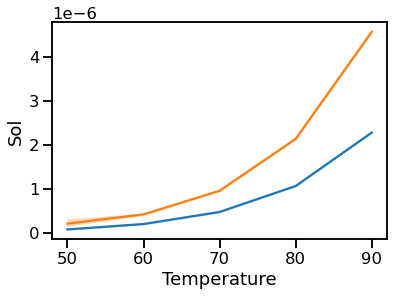

In [15]:
sns.lineplot(data=dfN[~dfN.isin([np.nan, np.inf, -np.inf]).any(1)]['Sol'])
sns.lineplot(data=dfP[~dfP.isin([np.nan, np.inf, -np.inf]).any(1)]['Sol'])

In [6]:
dfP = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_P_Keq_min_ATP1.cps', 
                            foldername='./results/new/new_P_Keq_min_ATP/', T0=50, T1=90, n=5, steps=5)

<AxesSubplot:xlabel='Temperature', ylabel='Sol'>

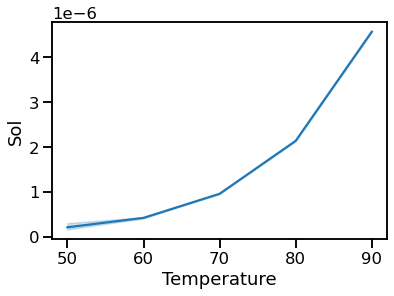

In [11]:
sns.lineplot(data=dfP[~dfP.isin([np.nan, np.inf, -np.inf]).any(1)]['Sol'])

In [16]:
dfN1 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_N_Keq_min_ratio1.cps', 
                            foldername='./results/new/new_N_Keq_min_ratio/', T0=50, T1=90, n=5, steps=5)

In [18]:
dfN1.reset_index().corr()

,Temperature,ET_NADS,ET_NAMPT,ET_NAPRT,ET_NMNAT1,ET_NRK1,ET_NT5,ET_PNP,Sol
Temperature,1.000000,0.099220,0.853382,-0.210713,-0.331881,-0.390099,-0.157533,0.042895,0.992846
ET_NADS,0.099220,1.000000,0.045603,-0.137910,-0.028545,-0.051740,-0.018286,-0.046275,0.096713
ET_NAMPT,0.853382,0.045603,1.000000,-0.180630,-0.357094,0.019256,-0.168116,-0.086410,0.890996
ET_NAPRT,-0.210713,-0.137910,-0.180630,1.000000,-0.133658,-0.041616,-0.064855,-0.108905,-0.179425
ET_NMNAT1,-0.331881,-0.028545,-0.357094,-0.133658,1.000000,-0.043202,-0.103947,-0.180468,-0.341270
ET_NRK1,-0.390099,-0.051740,0.019256,-0.041616,-0.043202,1.000000,0.012910,-0.154101,-0.332294
ET_NT5,-0.157533,-0.018286,-0.168116,-0.064855,-0.103947,0.012910,1.000000,0.259301,-0.164938
ET_PNP,0.042895,-0.046275,-0.086410,-0.108905,-0.180468,-0.154101,0.259301,1.000000,0.000043
Sol,0.992846,0.096713,0.890996,-0.179425,-0.341270,-0.332294,-0.164938,0.000043,1.000000


In [19]:
dfP1 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_P_Keq_min_ratio1.cps', 
                            foldername='./results/new/new_P_Keq_min_ratio/', T0=50, T1=90, n=5, steps=5)

<AxesSubplot:xlabel='Temperature', ylabel='Sol'>

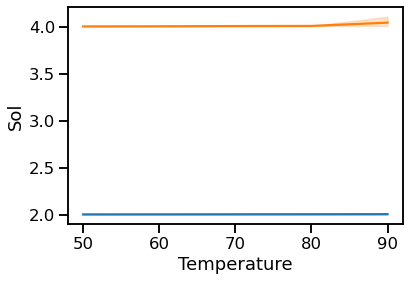

In [22]:
sns.lineplot(data=dfN1[~dfN1.isin([np.nan, np.inf, -np.inf]).any(1)]['Sol'])
sns.lineplot(data=dfP1[~dfP1.isin([np.nan, np.inf, -np.inf]).any(1)]['Sol'])

In [23]:
dfN2 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_N_Keq_max_NAD1.cps', 
                            foldername='./results/new/new_N_Keq_max_NAD/', T0=50, T1=90, n=5, steps=5)

In [25]:
dfP2 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_P_Keq_max_NAD1.cps', 
                            foldername='./results/new/new_P_Keq_max_NAD/', T0=50, T1=90, n=5, steps=5)

In [24]:
dfN2

,ET_NADS,ET_NAMPT,ET_NAPRT,ET_NMNAT1,ET_NRK1,ET_NT5,ET_PNP,Sol
Temperature,,,,,,,,
50.0,1000.000000,995084.046979,0.550105,2738.278811,0.001566,0.018225,0.001000,259.076369
50.0,3131.623642,953084.736850,863.430637,41371.291313,0.436111,0.001000,0.736657,252.816386
50.0,1000.000000,994548.338041,0.001000,3430.492476,0.164880,0.579146,0.075435,259.051453
50.0,1000.000000,989788.254303,0.008449,6834.830538,66.620586,0.001000,0.001000,258.479135
50.0,1000.000000,992976.306613,6.429630,4435.692293,2.034540,0.327604,0.001000,258.888139
60.0,2577.427132,987553.255769,4884.592686,2616.504035,7.396345,0.001000,107.636761,203.260020
60.0,13956.474326,945970.947960,4776.273371,11402.686599,15409.498835,171.139348,0.013492,198.238579
60.0,1000.000000,996481.255420,0.005054,1504.186371,0.004380,0.003818,0.001000,204.118724
60.0,1000.000000,989063.675035,0.034737,6634.270302,0.001000,0.089045,0.001585,203.655124


In [38]:
df = pd.read_csv('../data/new_PN_min_ATP.csv', sep='\t', index_col=0)
df.loc[(df.ET_PNCA<1.0), 'pathway'] = 'NAMPT'
df.loc[(df.ET_NAMPT<1.0), 'pathway'] = 'PNCA'
df.loc[:, 'objective'] = 'min_ATP'

In [33]:
df = pd.read_csv('../data/new_PN_Keq_min_ratio.csv', sep='\t')
df.loc[(df.ET_PNCA<=1.0), 'pathway'] = 'NAMPT'
df.loc[(df.ET_NAMPT<=1.0), 'pathway'] = 'PNCA'
df=df.dropna(axis=0)

In [42]:
#df1 = df.replace(np.inf, np.nan).dropna(axis=0)#.reset_index()
C, F = get_steadystate_CF(df=df1, model='../models/new/NAD_biosynthesis_PN_Keq_min_ATP1.cps')

Steady-state not found for 37
Steady-state not found for 1
Steady-state not found for 18
Steady-state not found for 63
Steady-state not found for 171
Steady-state not found for 175
Steady-state not found for 176
Steady-state not found for 223
Steady-state not found for 226
Steady-state not found for 227
Steady-state not found for 232
Steady-state not found for 237
Steady-state not found for 283
Steady-state not found for 286
Steady-state not found for 291


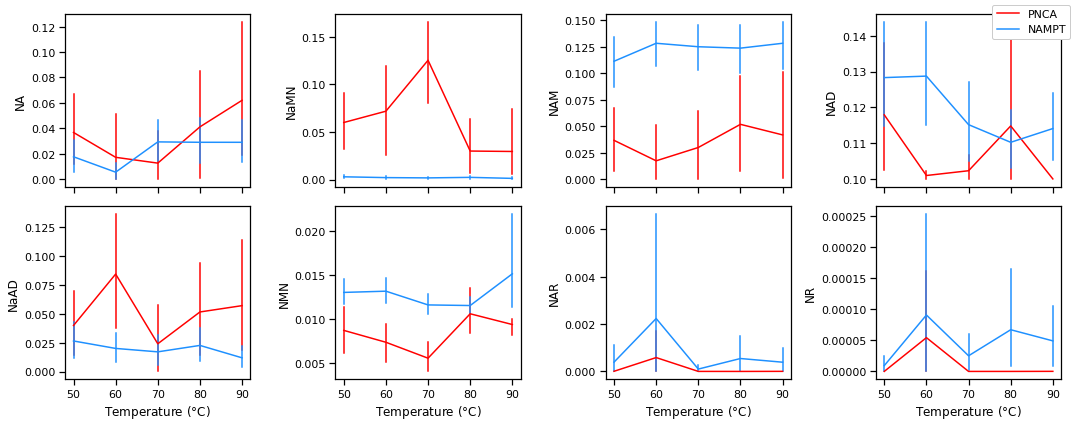

In [48]:
subplot_lineplot(df=sim.u.dropConstantCol(C), layout=(2,4), figsize=(15,6), hue='pathway', sharex=True)

<AxesSubplot:xlabel='temperature', ylabel='ATP consumption'>

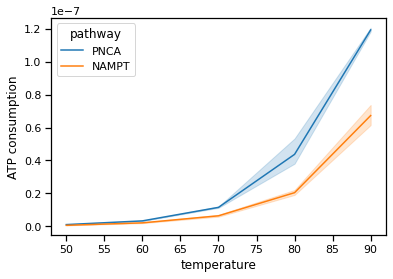

In [53]:
sns.lineplot(data=F, x=F.index, y='ATP consumption', hue='pathway')
#sns.lineplot(data=F, x=F.index, y='ATPconsNADprod', hue='pathway')

In [56]:
df = pd.read_csv('../data/new_PN_min_ratio.csv', sep='\t', index_col=0)
df.loc[(df.ET_PNCA<1.0), 'pathway'] = 'NAMPT'
df.loc[(df.ET_NAMPT<1.0), 'pathway'] = 'PNCA'
df.loc[:, 'objective'] = 'min_ratio'
df.to_csv('../data/new_PN_Keq_min_ratio.csv', sep='\t')

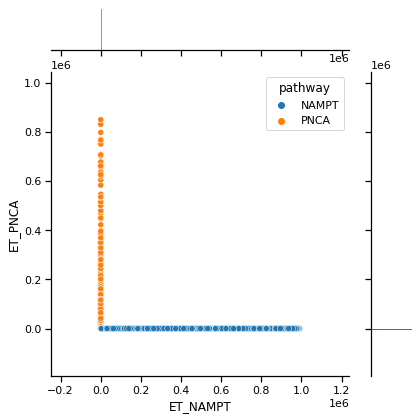

In [61]:
sns.jointplot(data=df[df.objective=='min_ratio'], x="ET_NAMPT", y="ET_PNCA", hue="pathway", space=0.5)
#sns.scatterplot(data=df, x=df.ET_NAMPT, y=df.ET_PNCA, hue='pathway')

In [63]:
df1 = df.replace(np.inf, np.nan).dropna(axis=0)#.reset_index()
C, F = get_steadystate_CF(df=df1, model='../models/new/NAD_biosynthesis_PN_Keq_min_ratio1.cps')

Steady-state not found for 87
Steady-state not found for 0
Steady-state not found for 9
Steady-state not found for 11
Steady-state not found for 22
Steady-state not found for 23
Steady-state not found for 29
Steady-state not found for 35
Steady-state not found for 36
Steady-state not found for 38
Steady-state not found for 39
Steady-state not found for 40
Steady-state not found for 41
Steady-state not found for 46
Steady-state not found for 54
Steady-state not found for 59
Steady-state not found for 60
Steady-state not found for 69
Steady-state not found for 71
Steady-state not found for 74
Steady-state not found for 78
Steady-state not found for 83
Steady-state not found for 93
Steady-state not found for 96
Steady-state not found for 99
Steady-state not found for 104
Steady-state not found for 109
Steady-state not found for 121
Steady-state not found for 123
Steady-state not found for 124
Steady-state not found for 132
Steady-state not found for 134
Steady-state not found for 135
Stea

Steady-state not found for 1086
Steady-state not found for 1089
Steady-state not found for 1090
Steady-state not found for 1091
Steady-state not found for 1094
Steady-state not found for 1095
Steady-state not found for 1098
Steady-state not found for 1099
Steady-state not found for 1102
Steady-state not found for 1104
Steady-state not found for 1106
Steady-state not found for 1121
Steady-state not found for 1124
Steady-state not found for 1126
Steady-state not found for 1128
Steady-state not found for 1129
Steady-state not found for 1134
Steady-state not found for 1135
Steady-state not found for 1141
Steady-state not found for 1144
Steady-state not found for 1145
Steady-state not found for 1146
Steady-state not found for 1149
Steady-state not found for 1154
Steady-state not found for 1159
Steady-state not found for 1161
Steady-state not found for 1171
Steady-state not found for 1173
Steady-state not found for 1175
Steady-state not found for 1191
Steady-state not found for 1196
Steady-s

Steady-state not found for 2073
Steady-state not found for 2076
Steady-state not found for 2079
Steady-state not found for 2082
Steady-state not found for 2084
Steady-state not found for 2086
Steady-state not found for 2087
Steady-state not found for 2088
Steady-state not found for 2091
Steady-state not found for 2094
Steady-state not found for 2095
Steady-state not found for 2100
Steady-state not found for 2116
Steady-state not found for 2123
Steady-state not found for 2132
Steady-state not found for 2139
Steady-state not found for 2148
Steady-state not found for 2150
Steady-state not found for 2151
Steady-state not found for 2165
Steady-state not found for 2166
Steady-state not found for 2170
Steady-state not found for 2184
Steady-state not found for 2192
Steady-state not found for 2194
Steady-state not found for 2204
Steady-state not found for 2210
Steady-state not found for 2214
Steady-state not found for 2220
Steady-state not found for 2223
Steady-state not found for 2226
Steady-s

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ssh041\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-63-22d65a37eaf7>", line 2, in <module>
    C, F = get_steadystate_CF(df=df1, model='../models/new/NAD_biosynthesis_PN_Keq_min_ratio1.cps')
  File "<ipython-input-31-ae813d00058b>", line 6, in get_steadystate_CF
    CN, FN = sim.getsteadystates(filepath_CPSmodel=model,
  File "D:\git\thermophilesNAD\python_codes\simulation.py", line 182, in getsteadystates
    dataModel.saveModel(filepath_cpsmodel, True)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ssh041\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute 

TypeError: object of type 'NoneType' has no len()

In [27]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df[df.pathway=='PNCA']

,ET_NADS,ET_NAMPT,ET_NAPRT,ET_NMNAT1,ET_NRK1,ET_NT5,ET_PNCA,ET_PNP,ET_SIRT,Sol,pathway
Temperature,,,,,,,,,,,
50.0,1000000.000000,0.001000,936115.565358,926457.239758,0.006443,0.001000,749918.317833,1.536379,453.884493,0.524357,PNCA
50.0,1000000.000000,0.098860,77426.630791,994139.734186,687221.345526,0.001000,1000000.000000,0.260723,453.416334,0.524357,PNCA
50.0,814555.198381,0.001246,128207.992154,378.386332,0.001288,0.450093,767467.760226,2584.381623,452.114590,0.518001,PNCA
50.0,1000000.000000,0.014587,3109.957891,1000000.000000,8411.411241,0.001000,930294.475050,0.054932,452.594353,0.524334,PNCA
50.0,1000000.000000,0.003849,652558.346686,954729.949221,608.704185,0.001000,1000000.000000,3650.511105,461.698982,0.524357,PNCA
...,...,...,...,...,...,...,...,...,...,...,...
90.0,182832.145746,0.001192,73526.705421,1709.753024,0.736767,0.001000,982.125422,123.287565,33.361621,0.523722,PNCA
90.0,1000000.000000,0.001000,826968.199298,1000000.000000,724502.406216,50.900779,989306.341174,93.106633,16.960297,0.524385,PNCA
90.0,1000000.000000,0.001000,29328.908680,1000000.000000,706616.562773,0.001000,1000000.000000,0.001000,18.336293,0.524384,PNCA


In [32]:
C, F = get_steadystate_CF(df=df, model='../models/new/NAD_biosynthesis_PN_mNAD1.cps')

Steady-state not found for 4
Steady-state not found for 9
Steady-state not found for 10
Steady-state not found for 15
Steady-state not found for 24
Steady-state not found for 28
Steady-state not found for 32
Steady-state not found for 43
Steady-state not found for 44
Steady-state not found for 55
Steady-state not found for 58
Steady-state not found for 75
Steady-state not found for 81
Steady-state not found for 106
Steady-state not found for 113
Steady-state not found for 133
Steady-state not found for 149
Steady-state not found for 159
Steady-state not found for 160
Steady-state not found for 164
Steady-state not found for 168
Steady-state not found for 173
Steady-state not found for 175
Steady-state not found for 176
Steady-state not found for 179
Steady-state not found for 189
Steady-state not found for 196
Steady-state not found for 197
Steady-state not found for 218
Steady-state not found for 220
Steady-state not found for 221
Steady-state not found for 242
Steady-state not found 

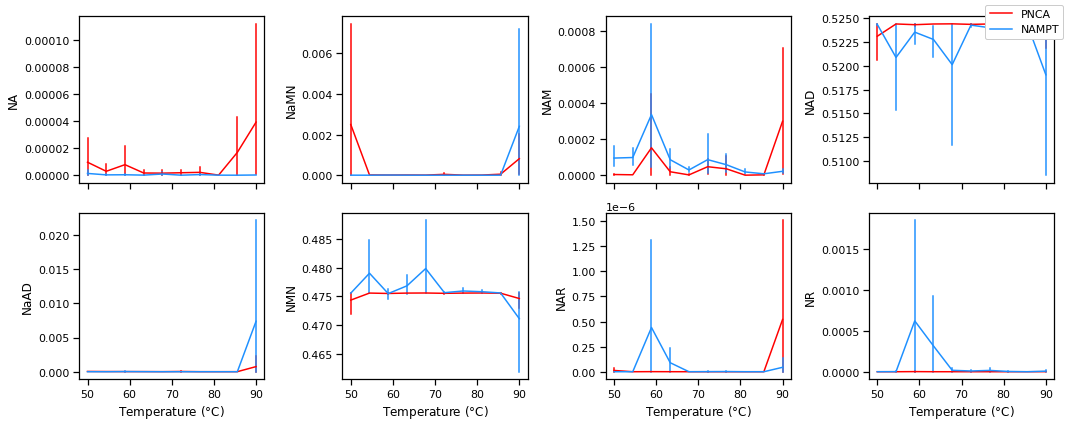

In [36]:
plot.subplot_lineplot(df=sim.u.dropConstantCol(C), layout=(2,4), figsize=(15,6), hue='pathway', sharex=True)

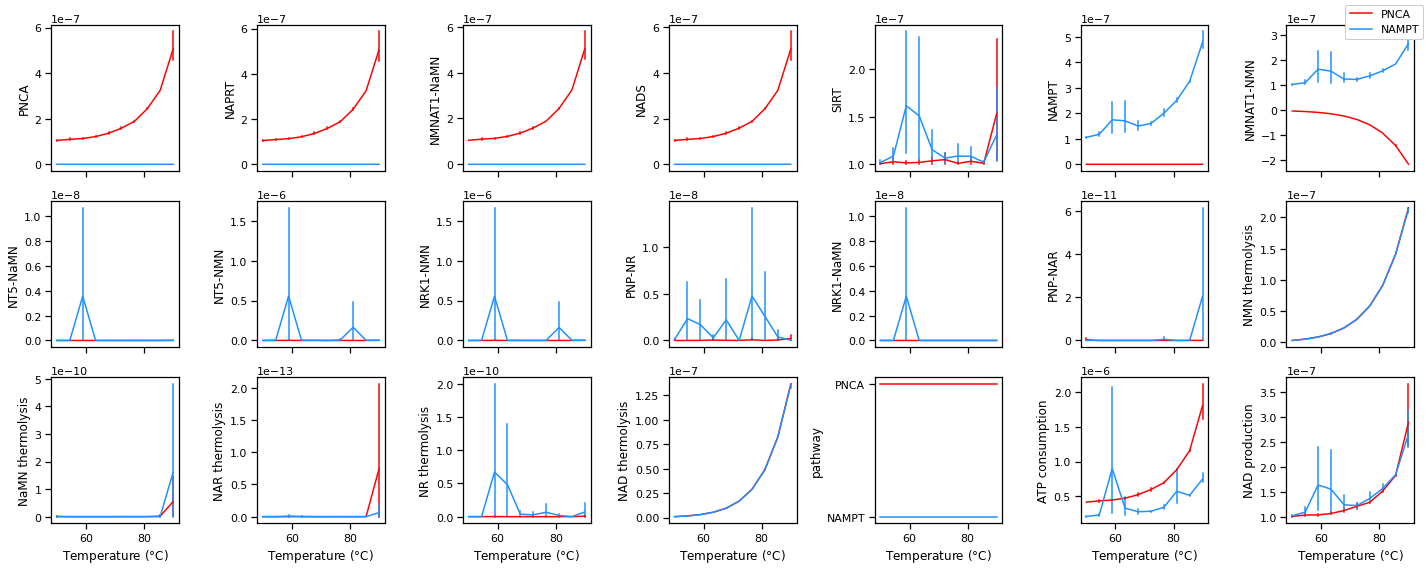

In [37]:
plot.subplot_lineplot(df=sim.u.dropConstantCol(F), layout=(3, 7), figsize=(20,8), hue='pathway', sharex=True)

In [12]:
setEa_andA('../models/NAD_biosynthesis_PN_mATPNAD_sirt.cps', p_arr, '../models/new/NAD_biosynthesis_PN_mATPNAD_sirt.cps')

True

In [14]:
setEa_andA('../models/NAD_biosynthesis_PN_mATPNAD_NAD.cps', p_arr, '../models/new/NAD_biosynthesis_PN_mATPNAD_NAD1.cps')

True

In [4]:
setEa_andA('../models/new/NAD_biosynthesis_PN.cps', p_arr, '../models/new/NAD_biosynthesis_PN_1.cps')

True

In [11]:
dfP = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_P_maxATPconsNADprod_diff.cps', 
                            foldername='./results/new/new_P_maxATPconsNADprod/', T0=50, T1=90, n=1, steps=10)

In [28]:
dfN = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_N_maxATPconsNADprod_diff.cps', 
                            foldername='./results/new/new_N_maxATPconsNADprod/', T0=50, T1=90, n=1, steps=10)

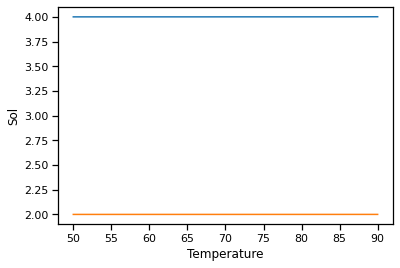

In [30]:
sns.lineplot(x=dfP.index, y=dfP.Sol, markers=True, dashes=False);
sns.lineplot(x=dfN.index, y=dfN.Sol, markers=True, dashes=False);

In [31]:
#CP, FP = C_and_F(dfP, model='../models/new/NAD_biosynthesis_P_maxATPconsNADprod_diff.cps')
CN, FN = C_and_F(dfN, model='../models/new/NAD_biosynthesis_N_maxATPconsNADprod_diff.cps')

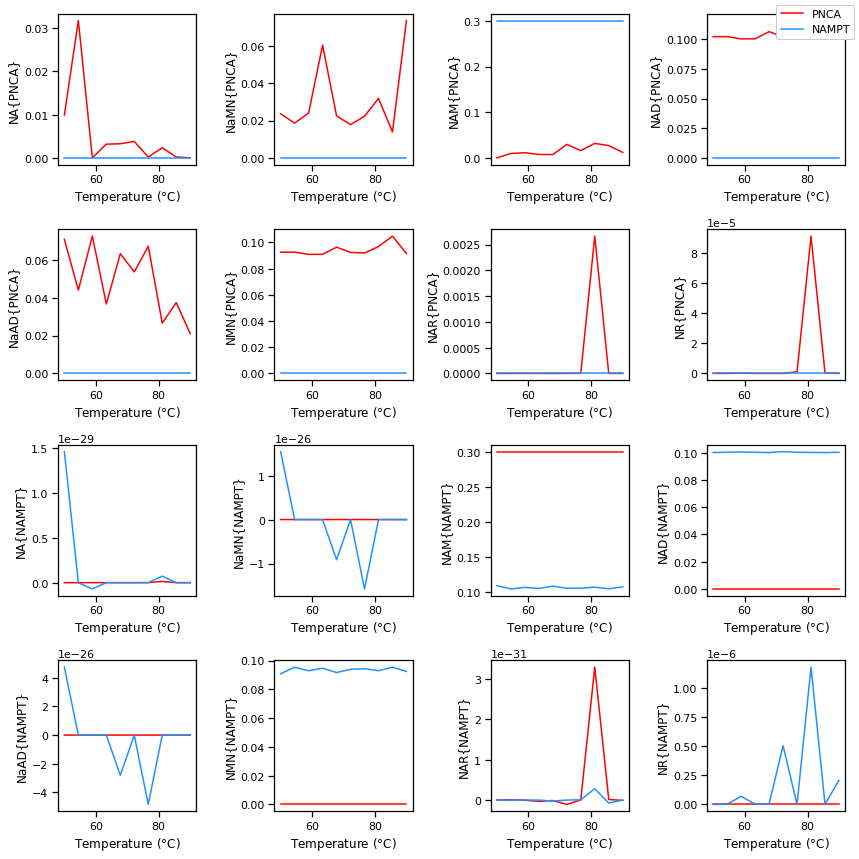

In [32]:
CP['pathway'] = 'PNCA'
CN['pathway'] = 'NAMPT'

subplot_lineplot(df=sim.u.dropConstantCol(pd.concat((CP, CN))), layout=(4,4), figsize=(12,12), hue='pathway')

In [ ]:
df = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_PN_mATP_sirt.cps', 
                            foldername='./results/new/new_PN_mATP_sirt/', T0=50, T1=90, n=1000, steps=10)

In [ ]:
df1 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_PN_mATP_sirt.cps', 
                            foldername='./results/new/new_PN_mATPNAD_sirt/', T0=50, T1=90, n=1000, steps=10)

In [31]:
df1 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_PN_mATPNAD_NAD.cps', 
                            foldername='./results/new/new_PN_mATPNAD_NAD/', T0=50, T1=90, n=1000, steps=10)

In [63]:
df2 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/new/NAD_biosynthesis_PN_mATP_NAD1.cps', 
                            foldername='./results/new/new_PN_mATP_NAD/', T0=50, T1=90, n=1000, steps=10)

KeyboardInterrupt: 

In [33]:
df0 = sim.readOptResults('./results/new/new_PN_mATP_sirt/temperature_scan/results/')
df1 = sim.readOptResults('./results/new/new_PN_mATPNAD_sirt/temperature_scan/results/')
df2 = sim.readOptResults('./results/new/new_PN_mATP_NAD/temperature_scan/results/')
df3 = sim.readOptResults('./results/new/new_PN_mATPNAD_NAD/temperature_scan/results/')

In [42]:
def plot_kde(df1, df2, label1='df1', label2='df2'):
    fig, axn = plt.subplots(3,3, figsize=(12,10))
    for i, ax in enumerate(axn.flat):
        sns.kdeplot(data=df1[df1.columns[i]], ax=ax, label=label1, shade=True)
        sns.kdeplot(data=df2[df2.columns[i]], ax=ax, label=label2, shade=True)
        #plt.legend()
    plt.tight_layout()
    return plt.show()

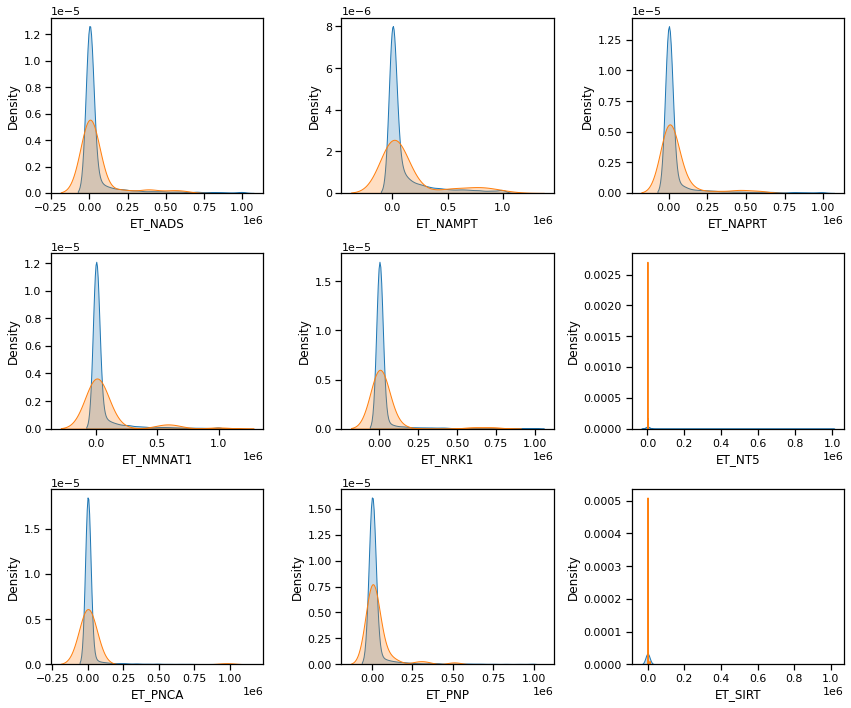

In [43]:
plot_kde(df3, df2)

In [39]:
df3['objective'] = 'minATPconsNADprod'
df2['objective'] = 'minATP'
df_32 = pd.concat((df3, df2))

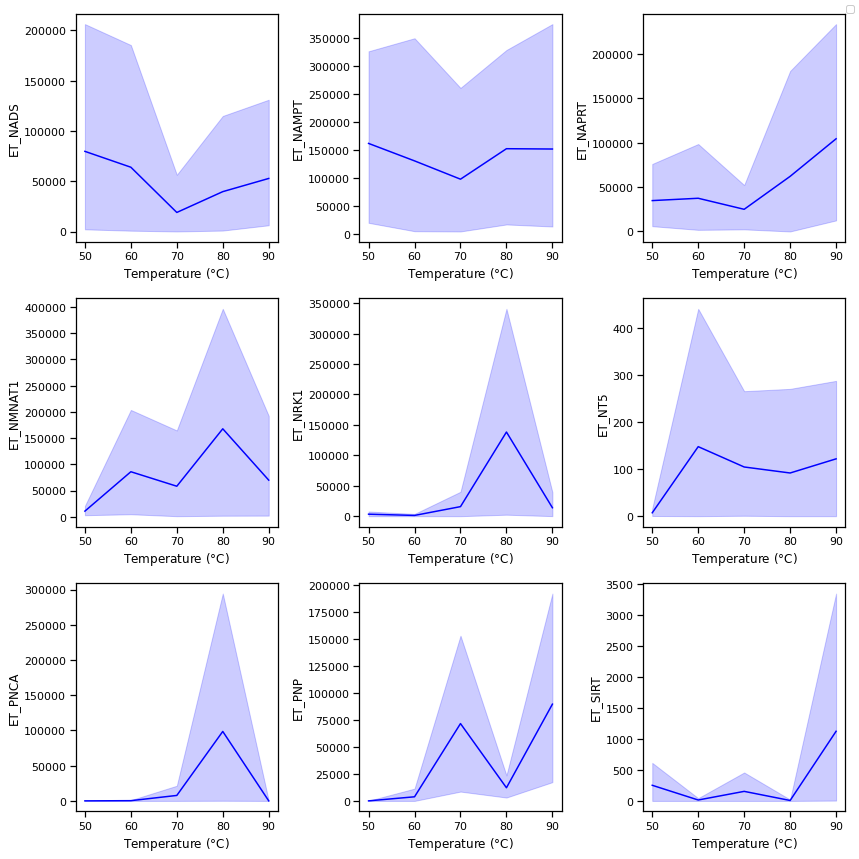

In [44]:
subplot_lineplot(df=df2.drop('Sol', axis=1), layout=(3,3), figsize=(12,12))#, hue='objective')

In [6]:
def PvsN(df):
    dfP = df[df.ET_NAMPT<1.0]
    dfN = df[df.ET_PNCA<1.0]
    return dfP, dfN

In [13]:
df0_P, df0_N = PvsN(df0.replace(np.inf, np.nan).dropna(axis=0))
df1_P, df1_N = PvsN(df1.replace(np.inf, np.nan).dropna(axis=0))
df2_P, df2_N = PvsN(df2.replace(np.inf, np.nan).dropna(axis=0))
df3_P, df3_N = PvsN(df3.replace(np.inf, np.nan).dropna(axis=0))

In [16]:
def C_and_F(df, model='../models/new/NAD_biosynthesis_PN_mATPNAD_NAD.cps'):
    C, F = sim.getsteadystates(filepath_CPSmodel=model, Optdf=df.reset_index().drop('Sol', axis=1))
    #F = sim.calculateATPconsFlux(F)
    return C, F

In [19]:
C3P, F3P = C_and_F(df3_P)
C3N, F3N = C_and_F(df3_N)

Steady-state not found for 13
Steady-state not found for 23
Steady-state not found for 27
Steady-state not found for 31
Steady-state not found for 34
Steady-state not found for 58
Steady-state not found for 69
Steady-state not found for 70
Steady-state not found for 82
Steady-state not found for 104
Steady-state not found for 106
Steady-state not found for 122
Steady-state not found for 137
Steady-state not found for 143
Steady-state not found for 146
Steady-state not found for 148
Steady-state not found for 154
Steady-state not found for 168
Steady-state not found for 174
Steady-state not found for 180
Steady-state not found for 194
Steady-state not found for 201
Steady-state not found for 202
Steady-state not found for 228
Steady-state not found for 245
Steady-state not found for 258
Steady-state not found for 260
Steady-state not found for 263
Steady-state not found for 274
Steady-state not found for 275
Steady-state not found for 280
Steady-state not found for 287
Steady-state not 

Steady-state not found for 2559
Steady-state not found for 2563
Steady-state not found for 2564
Steady-state not found for 2567
Steady-state not found for 2571
Steady-state not found for 2573
Steady-state not found for 2578
Steady-state not found for 2583
Steady-state not found for 2584
Steady-state not found for 2592
Steady-state not found for 2593
Steady-state not found for 2606
Steady-state not found for 2618
Steady-state not found for 2627
Steady-state not found for 2654
Steady-state not found for 2660
Steady-state not found for 2670
Steady-state not found for 2672
Steady-state not found for 2688
Steady-state not found for 2716
Steady-state not found for 2735
Steady-state not found for 2744
Steady-state not found for 2760
Steady-state not found for 2777
Steady-state not found for 2784
Steady-state not found for 2797
Steady-state not found for 2799
Steady-state not found for 2807
Steady-state not found for 2814
Steady-state not found for 2816
Steady-state not found for 2826
Steady-s

In [27]:
C3P['pathway'] = 'PNCA'
C3N['pathway'] = 'NAMPT'
CPN = pd.concat((C3P, C3N))

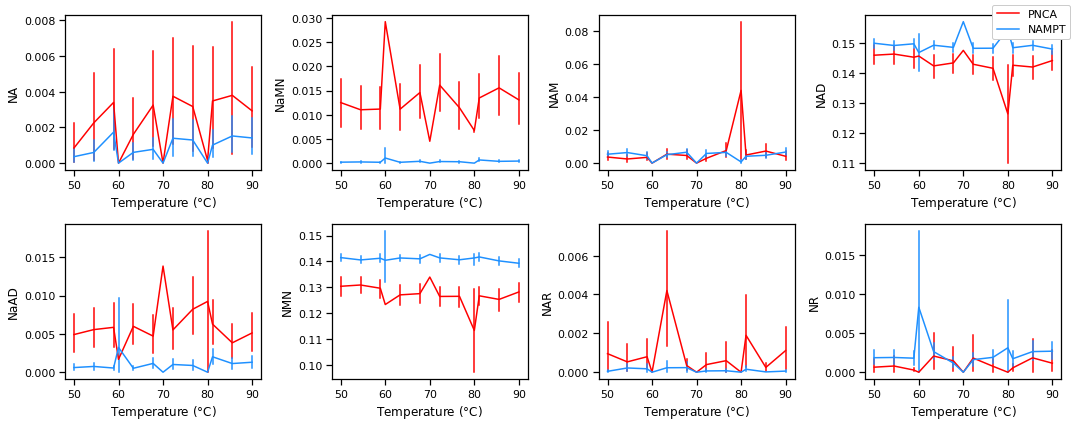

In [32]:
subplot_lineplot(df=sim.u.dropConstantCol(CPN), layout=(2,4), figsize=(15,6), hue='pathway', 
                 filename='../images/concentration_PN_mATPconsNADprod_NAD.png')

In [33]:
F3P['pathway'] = 'PNCA'
F3N['pathway'] = 'NAMPT'
FPN = pd.concat((F3P, F3N))

In [46]:
#CF_mATP_NAD = 
#pd.concat((CPN, FPN), axis=1).to_csv('../data/simulation/CF_mATP_NAD.csv', sep='\t')

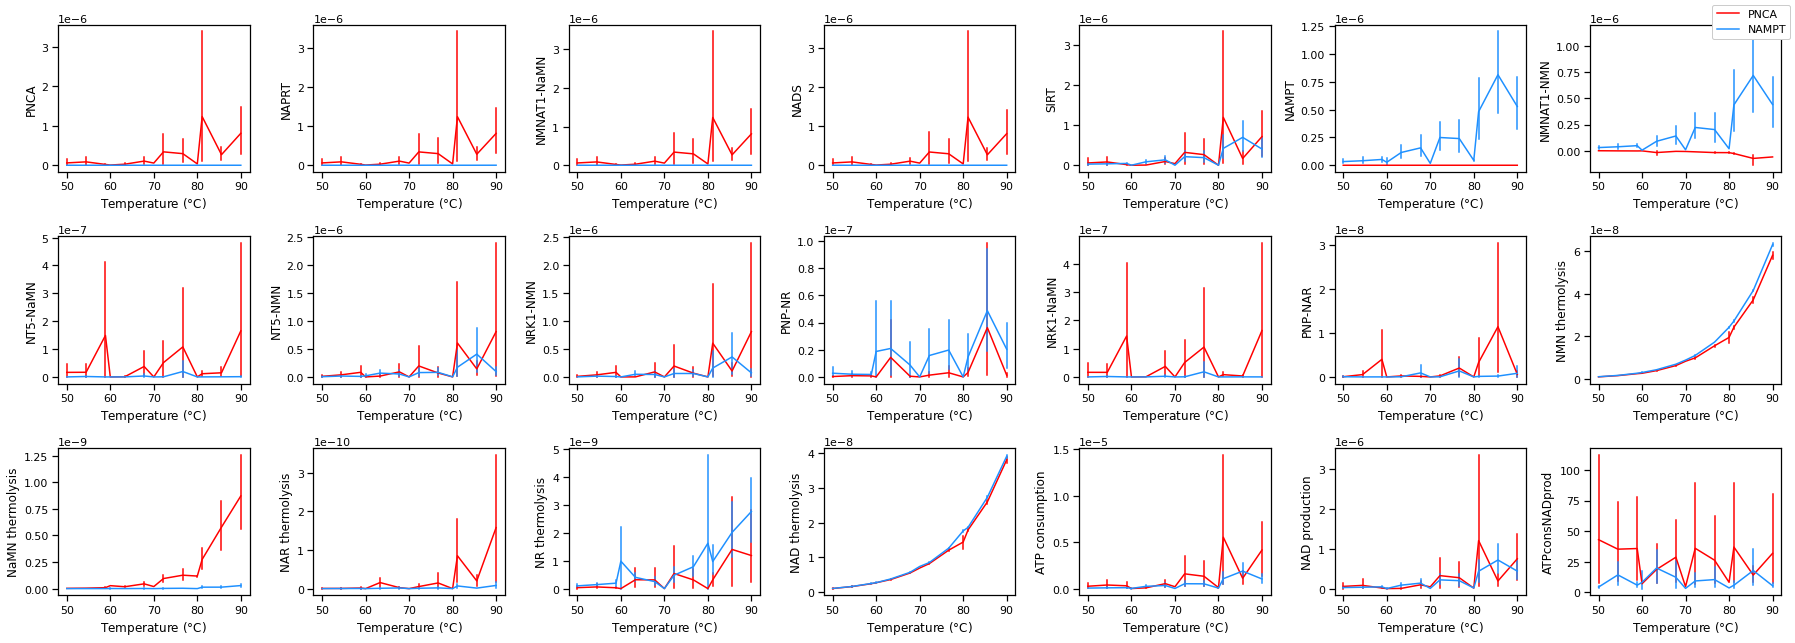

In [35]:
subplot_lineplot(df=sim.u.dropConstantCol(FPN), layout=(3,7), figsize=(25,9), hue='pathway', 
                 filename='../images/flux_PN_mATP_NAD.png')

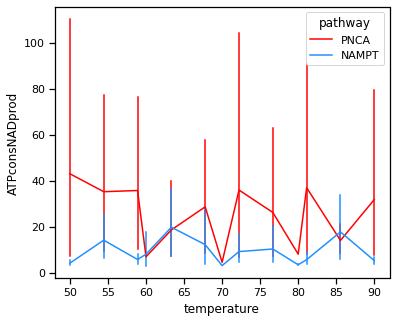

In [53]:
fig, ax = plt.subplots(figsize=(6,5))
lp = sns.lineplot(data=FPN, x=FPN.index, y='ATPconsNADprod', hue='pathway', err_style='bars', ax=ax, palette=['#FF0000', '#1E90FF'])
fig.savefig('../images/ATPconsNADprod_mATP_NAD.png', dpi=300)

In [44]:
FPN.groupby(FPN.index).mean()#[['ATPconsNADprod', 'pathway']]

,PNCA,NAPRT,NMNAT1-NaMN,NADS,SIRT,NAMPT,NMNAT1-NMN,NT5-NaMN,NT5-NMN,NRK1-NMN,...,NRK1-NaMN,PNP-NAR,NMN thermolysis,NaMN thermolysis,NAR thermolysis,NR thermolysis,NAD thermolysis,ATP consumption,NAD production,ATPconsNADprod
temperature,,,,,,,,,,,,,,,,,,,,,
50.000000,1.244660e-08,1.249090e-08,1.244660e-08,1.244660e-08,3.438320e-08,2.613675e-08,2.292598e-08,3.453331e-09,5.190456e-09,2.878419e-09,...,3.409566e-09,4.365224e-11,8.987289e-10,5.346480e-13,1.135370e-13,8.430808e-11,9.893863e-10,1.051814e-07,3.537259e-08,12.269549
54.444444,1.908212e-08,1.920488e-08,1.908212e-08,1.908212e-08,4.566608e-08,3.152366e-08,2.813606e-08,4.936120e-09,2.084300e-08,1.896470e-08,...,4.814407e-09,1.214331e-10,1.509289e-09,1.047057e-12,2.799984e-13,1.246491e-10,1.552100e-09,1.598900e-07,4.721818e-08,18.809192
58.888889,4.693564e-09,5.610165e-09,4.693564e-09,4.693564e-09,3.829470e-08,4.026768e-08,3.601848e-08,3.372812e-08,2.598782e-08,2.425454e-08,...,3.281365e-08,9.138637e-10,2.515928e-09,2.129698e-12,6.077973e-13,1.572170e-10,2.417338e-09,1.530452e-07,4.071204e-08,12.522496
60.000000,7.395652e-10,7.443908e-10,7.395652e-10,7.395652e-10,1.246211e-09,2.290076e-08,3.163689e-09,8.730763e-13,1.690514e-08,7.349303e-12,...,8.671002e-13,5.755948e-15,2.839275e-09,4.819585e-12,2.196456e-16,8.415411e-10,2.657043e-09,2.903575e-08,3.903254e-09,7.869342
63.333333,4.835548e-09,4.908696e-09,4.835548e-09,4.835548e-09,7.092289e-08,9.405870e-08,6.978620e-08,2.214373e-10,5.888675e-08,3.875119e-08,...,1.517015e-10,6.620336e-11,4.136945e-09,3.411579e-12,3.532386e-12,3.878751e-10,3.698854e-09,2.221631e-07,7.462175e-08,19.538926
67.777778,2.464955e-08,2.539440e-08,2.464955e-08,2.464955e-08,1.248759e-07,1.195996e-07,1.058241e-07,1.134155e-08,6.156683e-08,5.445533e-08,...,1.060806e-08,7.316315e-10,6.664070e-09,1.136114e-11,1.862596e-12,2.653476e-10,5.597690e-09,3.898301e-07,1.304736e-07,16.033746
70.000000,2.760927e-08,2.761888e-08,2.760927e-08,2.760927e-08,2.041528e-08,8.389044e-09,-8.635545e-11,3.635222e-16,1.327437e-15,9.291679e-19,...,1.155384e-19,3.631500e-16,8.475398e-09,9.610906e-12,2.773752e-22,6.401934e-18,7.107630e-09,1.187494e-07,2.752291e-08,3.806228
72.222222,6.544550e-08,6.553206e-08,6.544550e-08,6.544550e-08,2.341384e-07,2.012963e-07,1.771049e-07,1.021898e-08,1.006140e-07,8.714354e-08,...,1.015218e-08,6.508026e-11,1.072097e-08,1.975690e-11,1.724751e-12,4.910790e-10,8.411964e-09,7.375655e-07,2.425504e-07,14.319371
76.666667,5.618885e-08,5.771308e-08,5.618885e-08,5.618885e-08,2.035099e-07,1.939901e-07,1.598236e-07,3.628450e-08,7.990813e-08,6.263754e-08,...,3.478691e-08,1.493282e-09,1.689592e-08,2.664612e-11,4.302283e-12,6.926778e-10,1.250256e-08,6.775179e-07,2.160125e-07,13.318631


In [16]:
C2P, F2P = C_and_F(df2_P)
C2N, F2N = C_and_F(df2_N)

Steady-state not found for 10


In [ ]:
C2P, F2P = C_and_F(df2_P)
C2N, F2N = C_and_F(df2_N)

In [61]:
df2.reset_index().corr().style.background_gradient()

,Temperature,ET_NADS,ET_NAMPT,ET_NAPRT,ET_NMNAT1,ET_NRK1,ET_NT5,ET_PNCA,ET_PNP,ET_SIRT,Sol
Temperature,1.000000,-0.081953,0.000910,0.181468,0.136908,0.169477,0.087075,0.101407,0.281502,0.155756,0.186919
ET_NADS,-0.081953,1.000000,-0.118513,-0.043193,-0.122945,-0.090951,-0.109212,-0.058414,-0.075751,-0.047172,-0.015219
ET_NAMPT,0.000910,-0.118513,1.000000,0.042922,0.416678,-0.084974,0.049137,-0.080547,0.166646,0.417263,0.335724
ET_NAPRT,0.181468,-0.043193,0.042922,1.000000,0.439675,-0.093152,0.159629,-0.053579,-0.068812,-0.080824,-0.004737
ET_NMNAT1,0.136908,-0.122945,0.416678,0.439675,1.000000,-0.096588,0.344224,-0.050985,0.203507,0.327630,-0.041411
ET_NRK1,0.169477,-0.090951,-0.084974,-0.093152,-0.096588,1.000000,-0.059419,0.004704,-0.026567,-0.051001,-0.044772
ET_NT5,0.087075,-0.109212,0.049137,0.159629,0.344224,-0.059419,1.000000,-0.050608,0.191508,0.325441,0.005583
ET_PNCA,0.101407,-0.058414,-0.080547,-0.053579,-0.050985,0.004704,-0.050608,1.000000,-0.057219,-0.030767,-0.042961
ET_PNP,0.281502,-0.075751,0.166646,-0.068812,0.203507,-0.026567,0.191508,-0.057219,1.000000,0.688297,-0.080295
ET_SIRT,0.155756,-0.047172,0.417263,-0.080824,0.327630,-0.051001,0.325441,-0.030767,0.688297,1.000000,0.967063


In [59]:
df2

,ET_NADS,ET_NAMPT,ET_NAPRT,ET_NMNAT1,ET_NRK1,ET_NT5,ET_PNCA,ET_PNP,ET_SIRT,Sol,objective
Temperature,,,,,,,,,,,
50.0,0.012136,87086.712886,3.584432,0.371336,0.000111,1.469773,2.401520,0.000311,1433.184603,inf,minATP
50.0,5181.818220,0.334440,0.096188,0.000015,0.002123,5.462493,0.212925,3.821944,0.014401,inf,minATP
50.0,24099.111332,13912.764154,55090.216826,0.102896,0.001458,0.000002,47.591781,0.000027,0.000964,2.694461e-09,minATP
50.0,0.000652,19436.189913,21646.007889,215.116823,0.002981,0.000052,0.000001,12.095213,0.000181,3.007330e-09,minATP
50.0,458.250605,596860.641440,189497.612943,25180.254768,10893.698717,29.471480,0.629908,153.120690,0.000035,3.150217e-09,minATP
50.0,236533.596444,1.488048,2234.773784,6787.267481,1.655830,0.159443,0.000003,0.001491,1093.570714,inf,minATP
50.0,1499.350146,629.385307,4.294980,45480.756773,0.000011,36.128163,0.000002,458.063572,0.009327,2.502552e-09,minATP
50.0,525544.839148,159946.055223,79222.921007,9974.641372,0.876621,0.003109,9.291264,0.040276,0.002136,3.009315e-09,minATP
50.0,3968.276793,3597.113057,27.600324,0.159906,0.627226,0.045523,823.726440,0.090558,0.000022,3.521760e-09,minATP


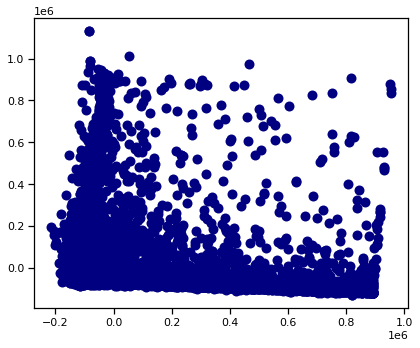

In [54]:
# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(df3.drop(['Sol', 'objective'], axis=1))
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=100, lw=0, label='True Position');
plt.tight_layout()
fig.savefig('../images/PCA_mATPconsNADprod.png', dpi=300)

In [56]:
len(X_true)

10030

In [18]:
#sns.kdeplot(data=df1, x='ET_PNCA', y='ET_NAMPT', fill=True);
#sns.kdeplot(data=df2, x='ET_PNCA', y='ET_NAMPT', fill=True);

In [57]:
def pairplot(df, layout, figsize, pairs):
    #pairs = [(comb) for comb in combinations(df.columns, 2)]
    fig, axn = plt.subplots(nrows=layout[0], ncols=layout[1], figsize=figsize)
    count = 0
    for i, ax in enumerate(axn.flat):
        kp = sns.kdeplot(data=df, x=pairs[i][0], y=pairs[i][1], ax=ax, fill=False, cbar=True)
        #kp.get_legend().remove()
    handles, labels = ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper right', framealpha=1.0, title="Temperature")
    plt.tight_layout()
    #fig.savefig('../images/optimisedET_mATP_cNAD.png', dpi=300)
    return plt.show()

In [46]:
print(len(list(combinations(['ET_NAMPT', 'ET_PNCA', 'ET_NMNAT1', 'ET_NAPRT', 'ET_NADS'], 2))))
pairs = [(comb) for comb in combinations(['ET_NAMPT', 'ET_PNCA', 'ET_NMNAT1', 'ET_NAPRT', 'ET_NADS'], 2)]

10


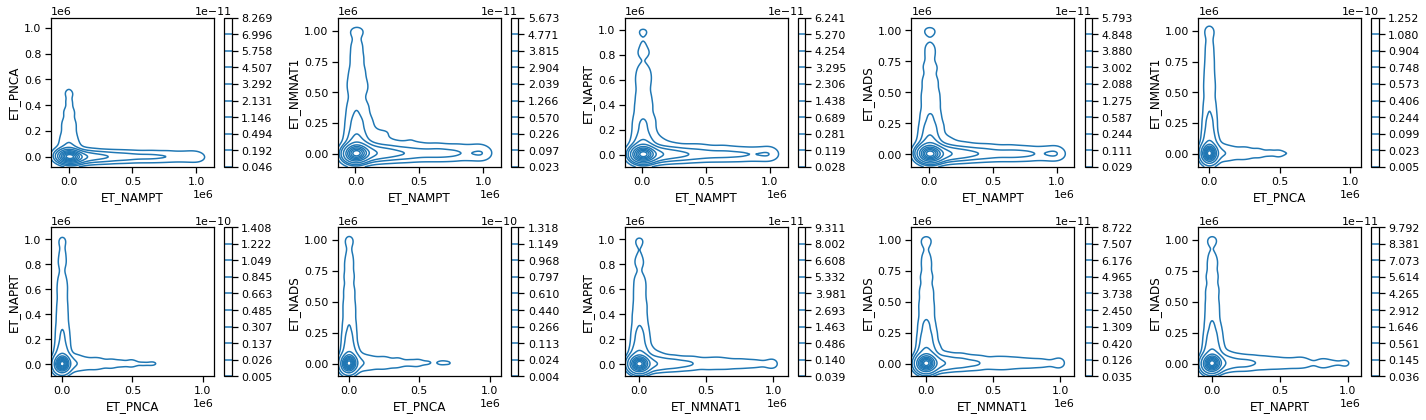

In [58]:
pairplot(df=df3[['ET_NAMPT', 'ET_PNCA', 'ET_NMNAT1', 'ET_NAPRT', 'ET_NADS']], layout=(2,5), figsize=(20,6), pairs=pairs)

In [90]:
print(len(list(combinations(df2.columns[:-1], 2))))
pairs = [(comb) for comb in combinations(df2.columns[:-1], 2)]

36


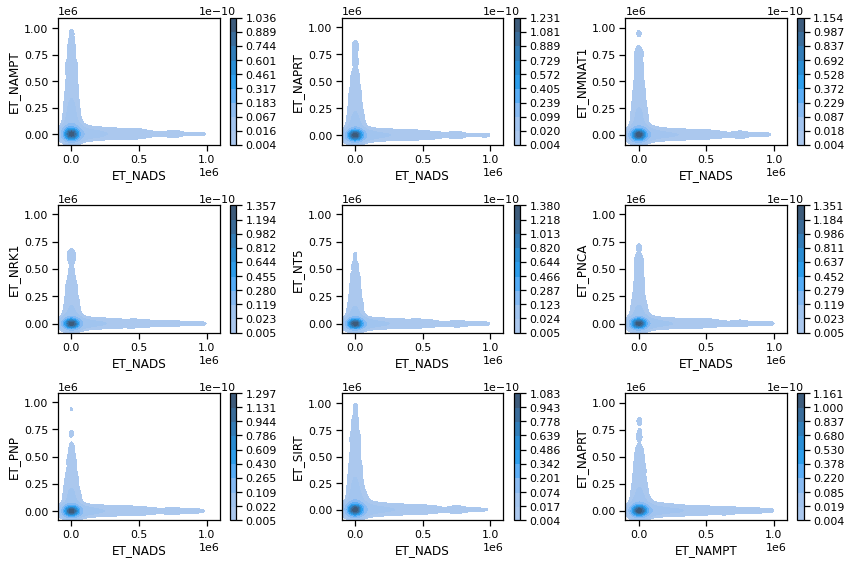

In [101]:
pairplot(df=df1.drop('Sol', axis=1), layout=(3,3), figsize=(12,8), pairs=pairs[:9])

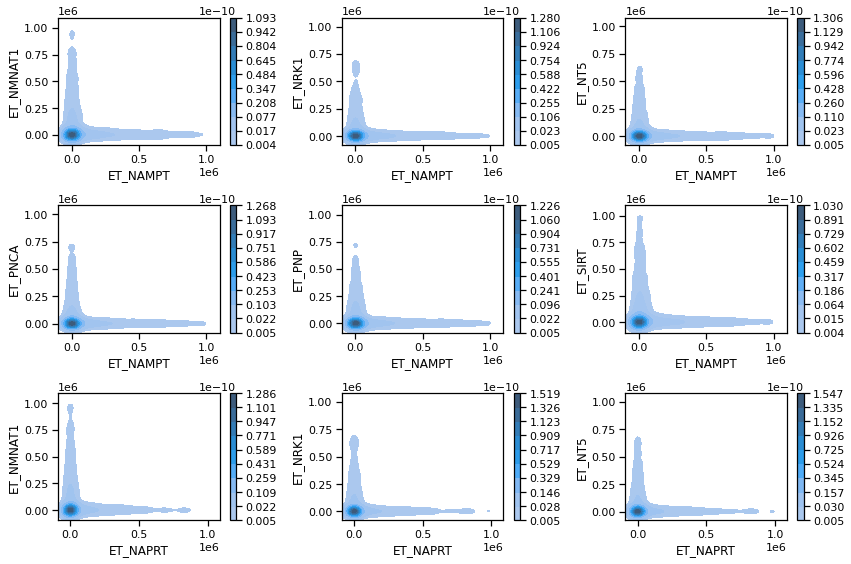

In [102]:
pairplot(df=df1.drop('Sol', axis=1), layout=(3,3), figsize=(12,8), pairs=pairs[9:18])

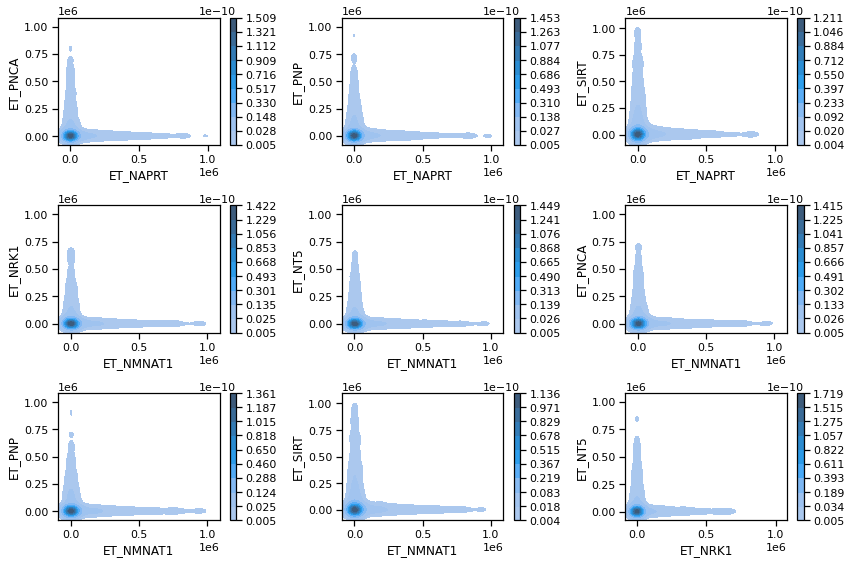

In [103]:
pairplot(df=df1.drop('Sol', axis=1), layout=(3,3), figsize=(12,8), pairs=pairs[18:27])

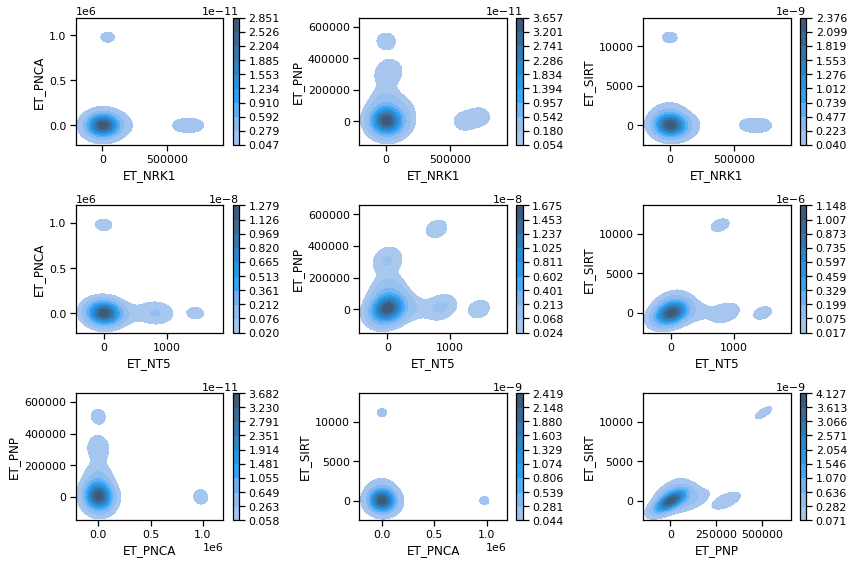

In [95]:
pairplot(df=df2.drop('Sol', axis=1), layout=(3,3), figsize=(12,8), pairs=pairs[27:])

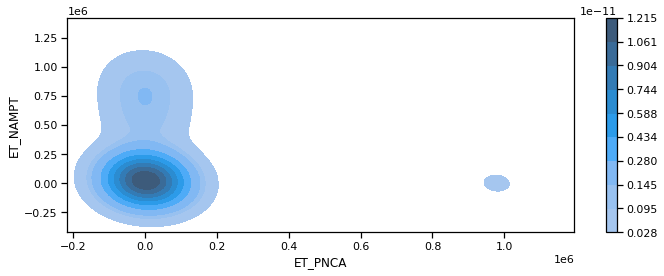

In [77]:
fig, ax = plt.subplots(figsize=(10,4))
#sns.kdeplot(data=df0, x='ET_PNCA', y='ET_NAMPT', label='min ATP sirtflux', fill=True);
#sns.kdeplot(data=df1, x='ET_PNCA', y='ET_NAMPT', label='min ATPNAD sirtflux', fill=True);
kp = sns.kdeplot(data=df2, x='ET_PNCA', y='ET_NAMPT', label='min ATP cNAD', fill=True, cbar=True);
#sns.kdeplot(data=df3, x='ET_PNCA', y='ET_NAMPT', label='min ATPNAD cNAD', fill=True);
#plt.legend();
plt.tight_layout();
#fig.savefig('../images/optimisedET_mATP_NAD.png', dpi=300)

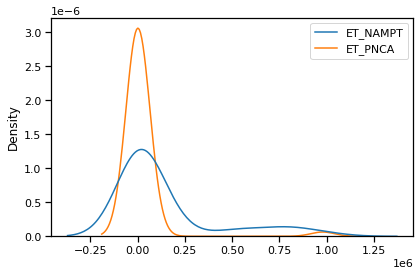

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(data=df2[['ET_NAMPT', 'ET_PNCA']])
plt.tight_layout()
fig.savefig('../images/optimisedET1_mATP_NAD.png', dpi=300)

In [32]:
plt.hist(df2, bins = int(180/15), stacked=True, normed=True, label=names)

NameError: name 'names' is not defined

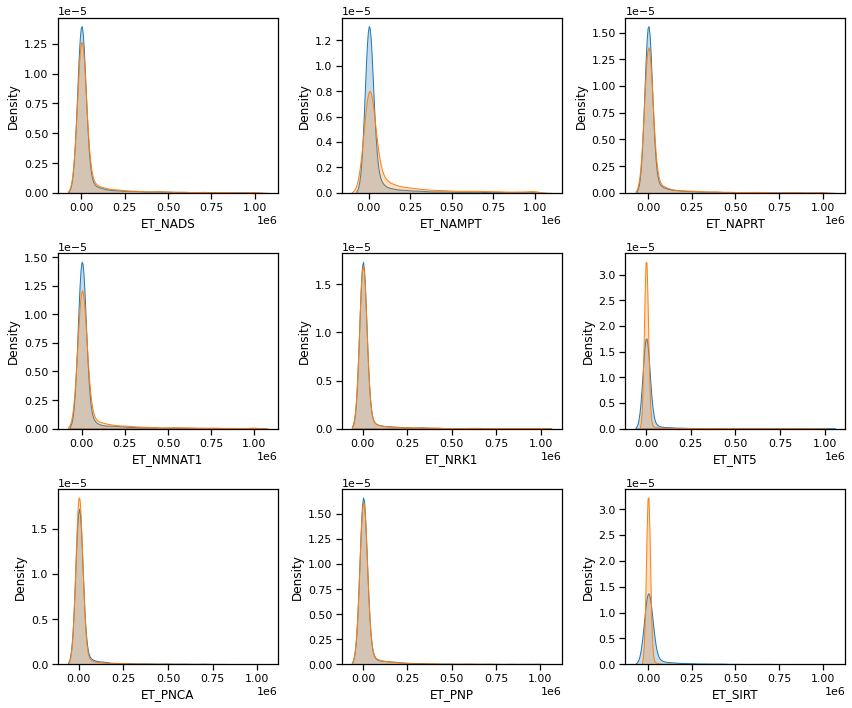

In [13]:
plot_kde(df1=df1, df2=df3)

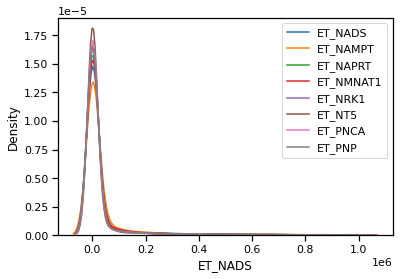

In [5]:
for col in df.columns[:-2]:
    sns.kdeplot(data=df[col], label=col)
plt.legend();

# Optimisation using measured degradation rates

In [34]:
df1 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis90_PN_mATP.cps', 
                            foldername='./results/fixed/fixed_PN90_sirt1/', T0=90, T1=90, n=100, steps=1)

In [36]:
df2 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis75_PN_mATP.cps', 
                            foldername='./results/fixed/fixed_PN75_sirt1/', T0=75, T1=75, n=100, steps=1)

In [37]:
df3 = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis50_PN_mATP.cps', 
                            foldername='./results/fixed/fixed_PN50_sirt1/', T0=50, T1=50, n=100, steps=1)

In [4]:
df90 = sim.readOptResults('./results/fixed/fixed_PN90_sirt/temperature_scan/results/')
df75 = sim.readOptResults('./results/fixed/fixed_PN75_sirt/temperature_scan/results/')
df50 = sim.readOptResults('./results/fixed/fixed_PN50_sirt/temperature_scan/results/')
df90_1 = sim.readOptResults('./results/fixed/fixed_PN90_sirt1/temperature_scan/results/')
df75_1 = sim.readOptResults('./results/fixed/fixed_PN75_sirt1/temperature_scan/results/')
df50_1 = sim.readOptResults('./results/fixed/fixed_PN50_sirt1/temperature_scan/results/')

In [5]:
df = pd.concat([df90, df75, df50, df90_1, df75_1, df50_1])
df = df.replace(np.inf, np.nan).dropna(axis=0)

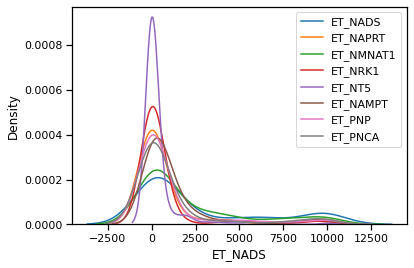

In [22]:
for col in df.columns[:-2]:
    sns.kdeplot(data=df[col], label=col)
plt.legend();

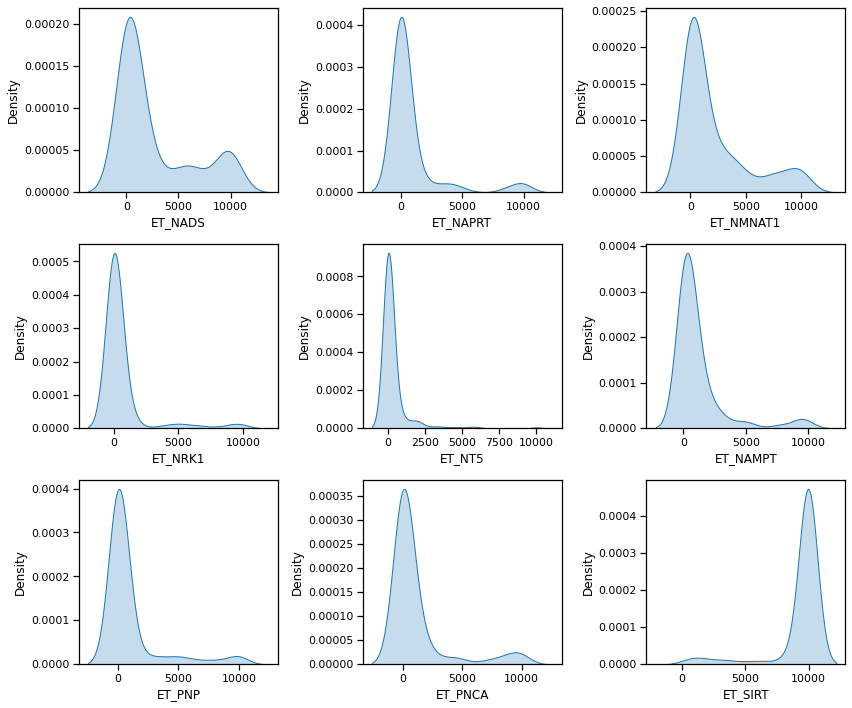

In [20]:
fig, axn = plt.subplots(3,3, figsize=(12,10))
for i, ax in enumerate(axn.flat):
    sns.kdeplot(data=df[df.columns[i]], ax=ax, shade=True)
plt.tight_layout()

In [7]:
df.reset_index().corr().style.background_gradient()

,Temperature,ET_NADS,ET_NAPRT,ET_NMNAT1,ET_NRK1,ET_NT5,ET_NAMPT,ET_PNP,ET_PNCA,ET_SIRT,Sol
Temperature,1.000000,-0.117395,-0.072761,-0.149737,-0.007923,0.001411,-0.462966,0.015453,-0.137906,-0.082197,0.080387
ET_NADS,-0.117395,1.000000,0.203299,-0.035093,0.026024,-0.090169,-0.148411,0.112646,0.084809,0.101575,-0.034636
ET_NAPRT,-0.072761,0.203299,1.000000,-0.040376,0.023275,-0.087084,0.003901,0.040046,-0.160759,0.090278,0.045773
ET_NMNAT1,-0.149737,-0.035093,-0.040376,1.000000,0.056916,-0.029593,0.230314,-0.030779,-0.071884,0.137702,-0.015269
ET_NRK1,-0.007923,0.026024,0.023275,0.056916,1.000000,-0.076248,-0.001566,-0.077454,-0.037675,0.091954,-0.017726
ET_NT5,0.001411,-0.090169,-0.087084,-0.029593,-0.076248,1.000000,0.058865,0.073646,-0.001996,0.094102,-0.040651
ET_NAMPT,-0.462966,-0.148411,0.003901,0.230314,-0.001566,0.058865,1.000000,-0.019281,-0.041361,-0.056664,-0.079554
ET_PNP,0.015453,0.112646,0.040046,-0.030779,-0.077454,0.073646,-0.019281,1.000000,0.018772,0.014824,-0.043822
ET_PNCA,-0.137906,0.084809,-0.160759,-0.071884,-0.037675,-0.001996,-0.041361,0.018772,1.000000,-0.336416,0.325431
ET_SIRT,-0.082197,0.101575,0.090278,0.137702,0.091954,0.094102,-0.056664,0.014824,-0.336416,1.000000,-0.513057


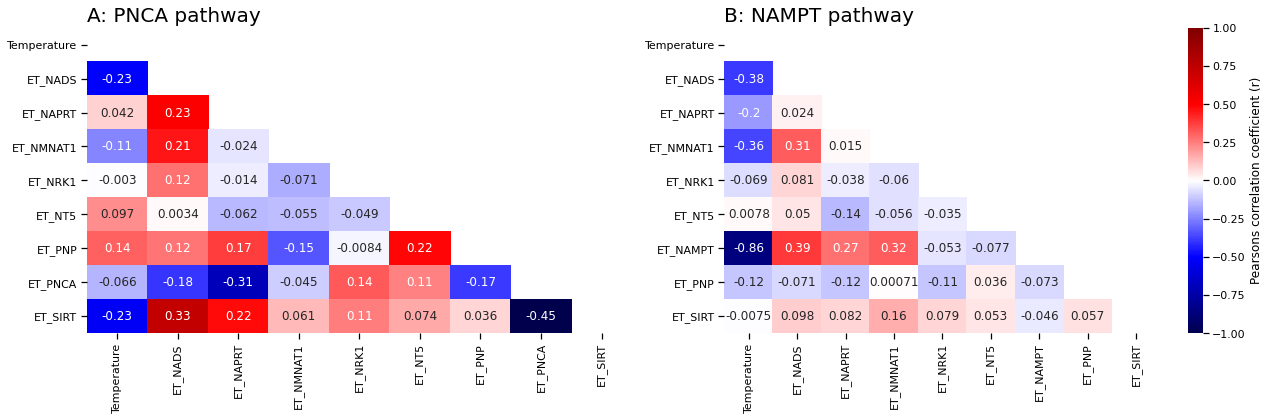

In [8]:
plot_corr(dfP=df[df.ET_NAMPT<1.0].reset_index().drop('ET_NAMPT', axis=1), 
         dfN=df[df.ET_PNCA<1.0].reset_index().drop('ET_PNCA', axis=1), savefile=True)

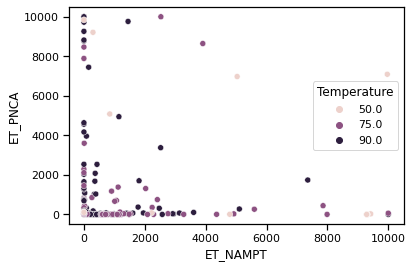

In [9]:
sns.scatterplot(data=df, x='ET_NAMPT', y='ET_PNCA', hue='Temperature');

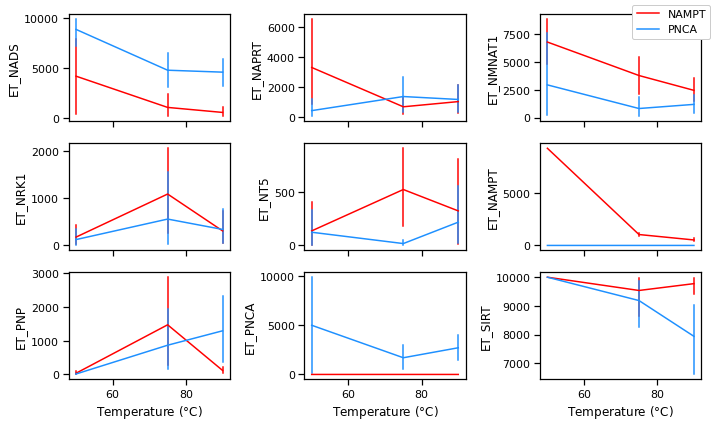

In [12]:
df.loc[df.ET_NAMPT<1.0, 'pathway'] = 'PNCA'
df.loc[df.ET_PNCA<1.0, 'pathway'] = 'NAMPT'
df.dropna(axis=0)
subplot_lineplot(df=df.drop('Sol', axis=1), layout=(3,3), figsize=(10,6), hue='pathway', sharex=True)

## Simulated levels of metabolite concentrations and metabolic fluxes

In [48]:
df90P = df90[df90.ET_NAMPT<1.0]
df90N = df90[df90.ET_PNCA<1.0]

In [49]:
C1P, F1P = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis90_PN_mATP.cps',
                            Optdf=df90P.reset_index().drop('Sol', axis=1))
F1P = sim.calculateATPconsFlux(F1P)
C1N, F1N = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis90_PN_mATP.cps',
                            Optdf=df90N.reset_index().drop('Sol', axis=1))
F1N = sim.calculateATPconsFlux(F1N)

Steady-state not found for 24
Steady-state not found for 6
Steady-state not found for 15
Steady-state not found for 16
Steady-state not found for 24


In [54]:
CF90P = sim.u.dropConstantCol(pd.concat([C1P, F1P], axis=1))
CF90P = CF90P[CF90P.ATPconsNADprod < 5 * CF90P.ATPconsNADprod.median()]
CF90N = sim.u.dropConstantCol(pd.concat([C1N, F1N], axis=1))
CF90N = CF90N[CF90N.ATPconsNADprod < 5 * CF90N.ATPconsNADprod.median()]

In [55]:
print(f'Mean ATP consumption per NAD production via PNCA: {CF90P.ATPconsNADprod.mean()}')
print(f'Mean ATP consumption per NAD production via NAMPT: {CF90N.ATPconsNADprod.mean()}')

Mean ATP consumption per NAD production via PNCA: 5.960632282777265
Mean ATP consumption per NAD production via NAMPT: 3.7220026629662737


In [56]:
df2P = df75.loc[(df75.index==75.0) & (df75.ET_NAMPT<1.0)]
df2N = df75.loc[(df75.index==75.0) & (df75.ET_PNCA<1.0)]

In [57]:
C2P, F2P = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis75_PN_mATP.cps',
                            Optdf=df2P.reset_index().drop('Sol', axis=1))
F2P = sim.calculateATPconsFlux(F2P)
C2N, F2N = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis75_PN_mATP.cps',
                            Optdf=df2N.reset_index().drop('Sol', axis=1))
F2N = sim.calculateATPconsFlux(F2N)

Steady-state not found for 0
Steady-state not found for 4
Steady-state not found for 8
Steady-state not found for 22
Steady-state not found for 25
Steady-state not found for 26
Steady-state not found for 2
Steady-state not found for 3
Steady-state not found for 4
Steady-state not found for 5
Steady-state not found for 6
Steady-state not found for 7
Steady-state not found for 8
Steady-state not found for 10
Steady-state not found for 17
Steady-state not found for 22
Steady-state not found for 25
Steady-state not found for 27
Steady-state not found for 28


In [58]:
CF75P = sim.u.dropConstantCol(pd.concat([C2P, F2P], axis=1))
CF75P = CF75P[CF75P.ATPconsNADprod < 5 * CF75P.ATPconsNADprod.median()]
CF75N = sim.u.dropConstantCol(pd.concat([C2N, F2N], axis=1))
CF75N = CF75N[CF75N.ATPconsNADprod < 5 * CF75N.ATPconsNADprod.median()]

In [59]:
print(f'Mean ATP consumption per NAD production via PNCA: {CF75P.ATPconsNADprod.mean()}')
print(f'Mean ATP consumption per NAD production via NAMPT: {CF75N.ATPconsNADprod.mean()}')

Mean ATP consumption per NAD production via PNCA: 34.57418834531518
Mean ATP consumption per NAD production via NAMPT: 3.691023649479302


In [60]:
df3P = df50[df50.ET_NAMPT<1.0]
df3N = df50[df50.ET_PNCA<1.0]

In [61]:
C3P, F3P = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis50_PN_mATP.cps',
                            Optdf=df3P.reset_index().drop('Sol', axis=1))
F3P = sim.calculateATPconsFlux(F3P)
C3N, F3N = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis50_PN_mATP.cps',
                            Optdf=df3N.reset_index().drop('Sol', axis=1))
F3N = sim.calculateATPconsFlux(F3N)

Steady-state not found for 6
Steady-state not found for 7
Steady-state not found for 13
Steady-state not found for 15
Steady-state not found for 16
Steady-state not found for 22
Steady-state not found for 24
Steady-state not found for 26
Steady-state not found for 29
Steady-state not found for 31
Steady-state not found for 34
Steady-state not found for 35
Steady-state not found for 37
Steady-state not found for 38
Steady-state not found for 40
Steady-state not found for 1
Steady-state not found for 4
Steady-state not found for 5
Steady-state not found for 6
Steady-state not found for 10
Steady-state not found for 13
Steady-state not found for 14
Steady-state not found for 17
Steady-state not found for 18
Steady-state not found for 20
Steady-state not found for 21
Steady-state not found for 22
Steady-state not found for 24
Steady-state not found for 25
Steady-state not found for 26
Steady-state not found for 27
Steady-state not found for 28
Steady-state not found for 30


In [62]:
CF50P = sim.u.dropConstantCol(pd.concat([C3P, F3P], axis=1))
CF50P = CF50P[CF50P.ATPconsNADprod < 5 * CF50P.ATPconsNADprod.median()]
CF50N = sim.u.dropConstantCol(pd.concat([C3N, F3N], axis=1))
CF50N = CF50N[CF50N.ATPconsNADprod < 5 * CF50N.ATPconsNADprod.median()]

In [63]:
print(f'Mean ATP consumption per NAD production via PNCA: {CF50P.ATPconsNADprod.mean()}')
print(f'Mean ATP consumption per NAD production via NAMPT: {CF50N.ATPconsNADprod.mean()}')

Mean ATP consumption per NAD production via PNCA: 573.1914888636626
Mean ATP consumption per NAD production via NAMPT: 4.269665598954632


In [64]:
CFP = pd.concat([CF50P, CF75P, CF90P])
CFP['pathway'] = 'PNCA'
CFN = pd.concat([CF50N, CF75N, CF90N])
CFN['pathway'] = 'NAMPT'
CF = pd.concat([CFP, CFN])
CF.to_csv('../data/simulation/simulated_CF.csv', sep='\t');

In [65]:
CF = pd.read_csv('../data/simulation/simulated_CF.csv', sep='\t', index_col='temperature')

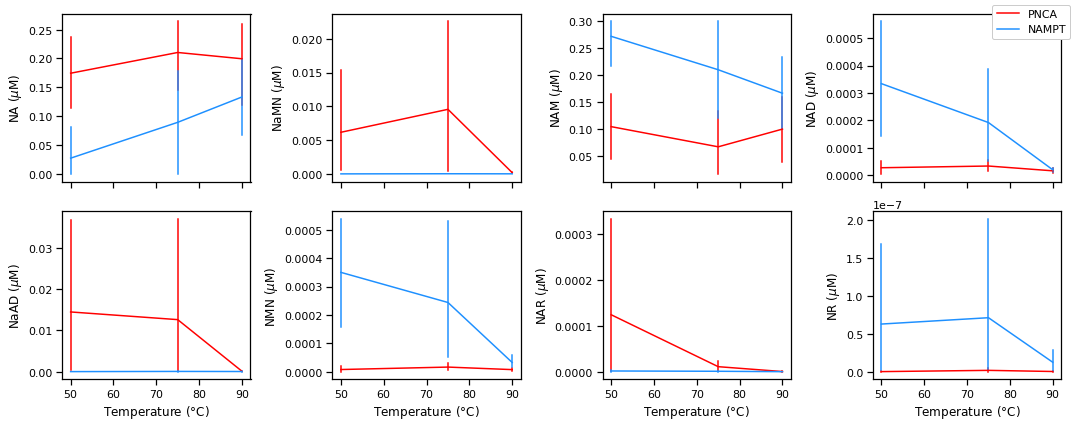

In [73]:
mconc = CF[list(CF.columns[:8])+['pathway',]]
mconc = mconc.rename(columns={i:i+' ($\mu$M)' for i in mconc.columns[:8]})
subplot_lineplot(df=mconc, layout=(2,4), figsize=(15,6), hue='pathway', sharex=True,
                filename='../../Thermophiles/paper/figures/simulatedConc.png')

In [69]:
def corr_plot(df):
    fig, ax = plt.subplots(figsize=(15,10))
    corr = df.drop('Sol', axis=1).corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    #ax.set_title('B: NAMPT pathway', fontsize=20, loc='left')
    sns.heatmap(data=corr, cmap='seismic', center=0.0, mask=mask, ax=ax,
                   cbar_kws={'label': 'Pearsons correlation coefficient (r)'});
    plt.tight_layout()
    return plt.show()

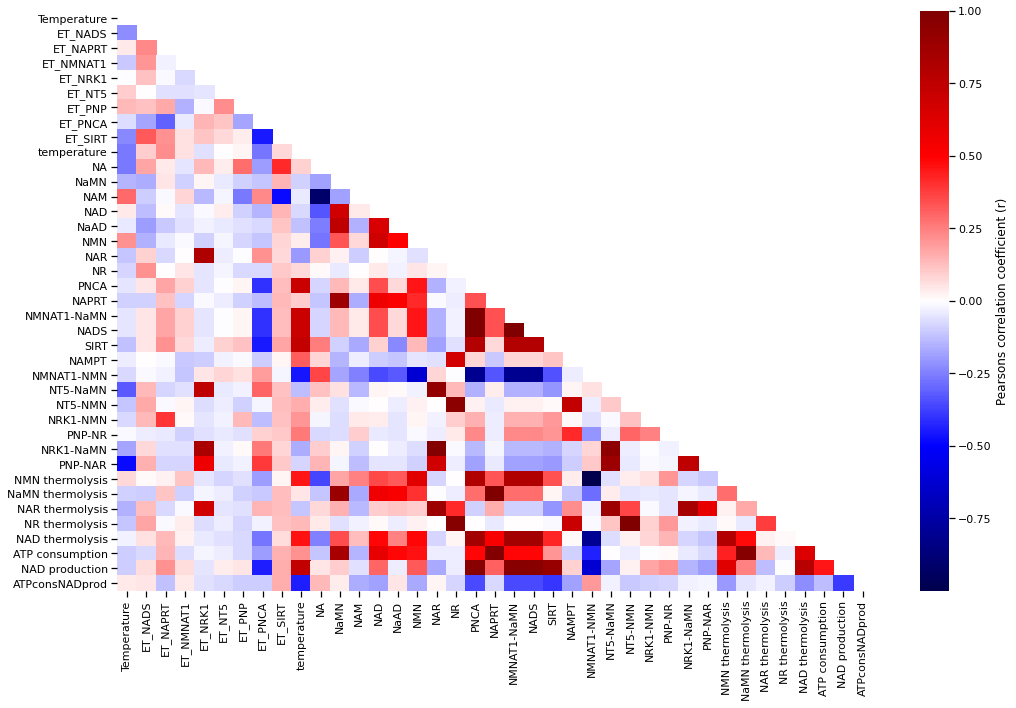

In [70]:
dfP_E_CF = pd.concat([df[df.ET_NAMPT<1.0].reset_index().drop('ET_NAMPT', axis=1), CF[CF.pathway=='PNCA'].reset_index().drop('pathway', axis=1)], axis=1)
corr_plot(dfP_E_CF)

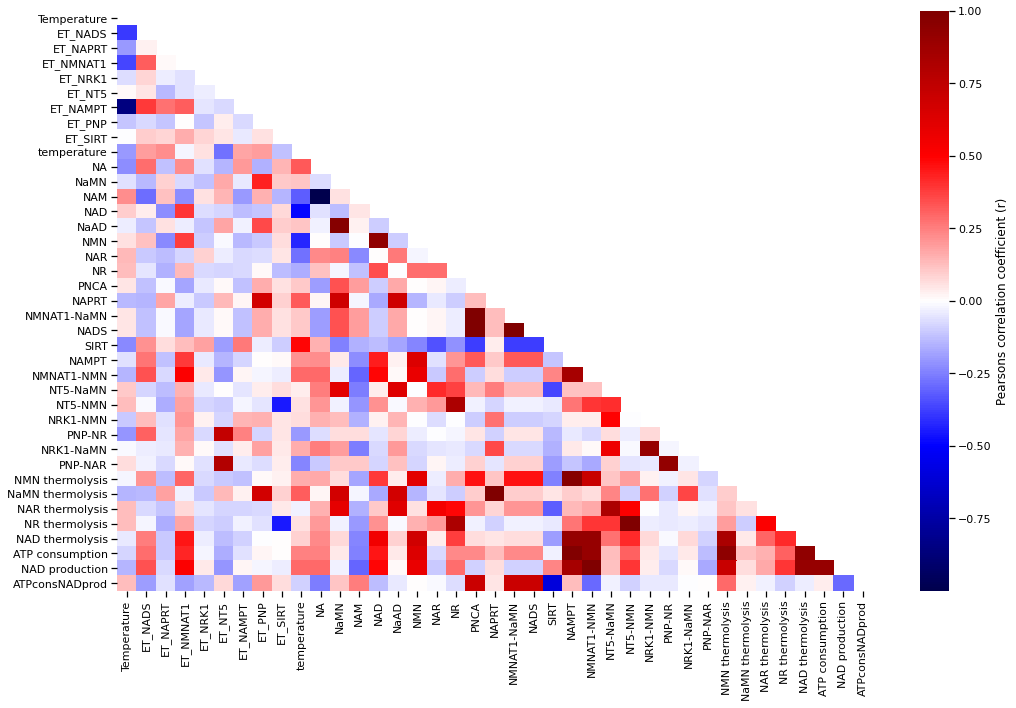

In [71]:
dfN_E_CF = pd.concat([df[df.ET_PNCA<1.0].reset_index().drop('ET_PNCA', axis=1), CF[CF.pathway=='NAMPT'].reset_index().drop('pathway', axis=1)], axis=1)
corr_plot(dfN_E_CF)

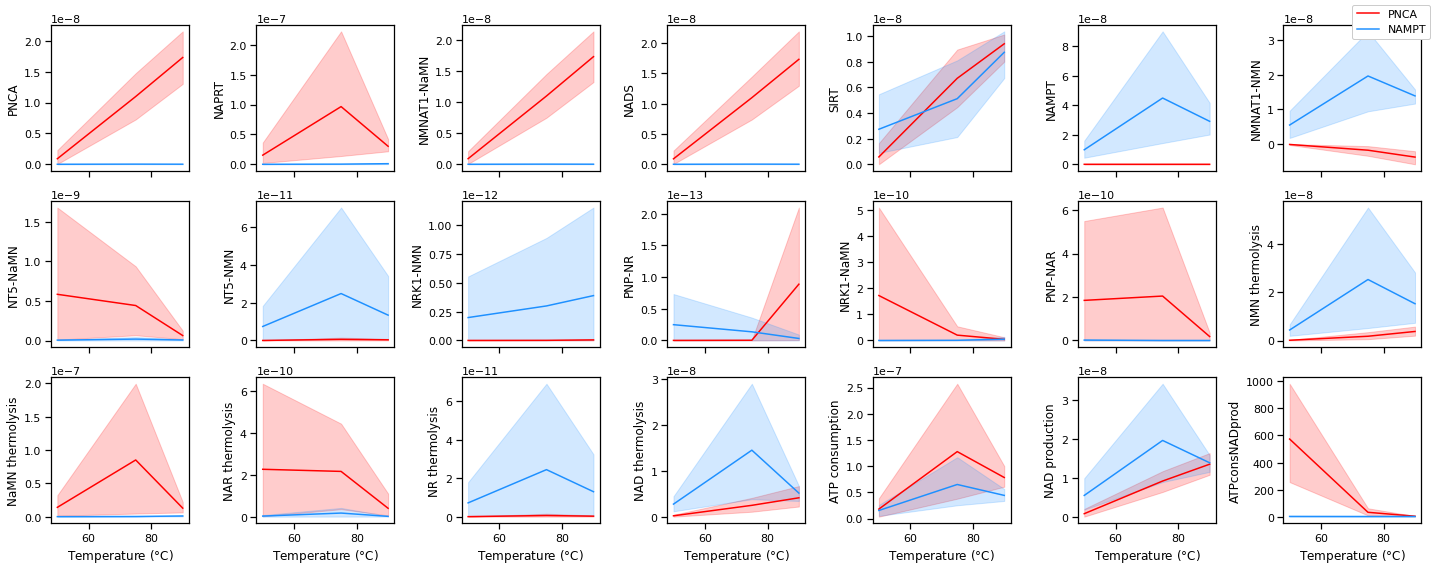

In [68]:
subplot_lineplot(df=CF[CF.columns[8:]], figsize=(20,8), layout=(3,7), hue='pathway', sharex=True)
                 #filename='../../Thermophiles/paper/figures/simulatedFlux.png')

In [13]:
df1P = sim.scan_and_optimize(parameterName='temperature', 
                            filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis90_P_mATP.cps', 
                            foldername='./results/fixed/fixed_P90_sirt/', T0=90, T1=90, n=100, steps=1)
#df1P = sim.readOptResults('./results/fixed/fixed_P90_sirt/temperature_scan/results/')
df1N = sim.scan_and_optimize(parameterName='temperature', 
                             filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis90_N_mATP.cps', 
                             foldername='./results/fixed/fixed_N90_sirt/', T0=90, T1=90, n=100, steps=1)
#df1N = sim.readOptResults('./results/fixed/fixed_N90_sirt/temperature_scan/results/')

In [17]:
#df2P = sim.scan_and_optimize(parameterName='temperature', 
#                            filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis75_P_mATP.cps', 
#                            foldername='./results/fixed/fixed_P75_sirt/', T0=75, T1=75, n=100, steps=1)
df2P = sim.readOptResults('./results/fixed/fixed_P75_sirt/temperature_scan/results/')
#df2N = sim.scan_and_optimize(parameterName='temperature', 
#                             filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis75_N_mATP.cps', 
#                             foldername='./results/fixed/fixed_N75_sirt/', T0=75, T1=75, n=100, steps=1)
df2N = sim.readOptResults('./results/fixed/fixed_N75_sirt/temperature_scan/results/')

In [20]:
#df3P = sim.scan_and_optimize(parameterName='temperature', 
#                            filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis50_P_mATP.cps', 
#                            foldername='./results/fixed/fixed_P50_sirt/', T0=50, T1=50, n=100, steps=1)
df3P = sim.readOptResults('./results/fixed/fixed_P50_sirt/temperature_scan/results/')
#df3N = sim.scan_and_optimize(parameterName='temperature', 
#                             filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis50_N_mATP.cps', 
#                             foldername='./results/fixed/fixed_N50_sirt/', T0=50, T1=50, n=100, steps=1)
df3N = sim.readOptResults('./results/fixed/fixed_N50_sirt/temperature_scan/results/')

In [8]:
dfP = pd.concat([df1P, df2P, df3P]).replace(np.inf, np.nan).dropna(axis=0)
dfN = pd.concat([df1N, df2N, df3N]).replace(np.inf, np.nan).dropna(axis=0)

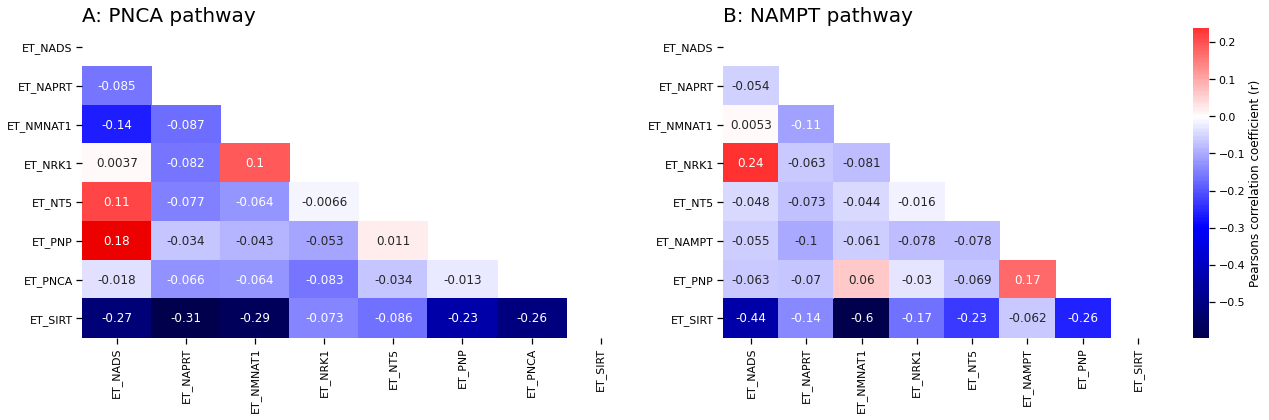

In [11]:
plot_corr(dfP, dfN)

In [16]:
C1P, F1P = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis90_P_mATP.cps',
                               Optdf=df1P.replace(np.inf, np.nan).dropna(axis=0).reset_index().drop('Sol', axis=1))
F1P = sim.calculateATPconsFlux(F1P)
C1N, F1N = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis90_N_mATP.cps',
                               Optdf=df1N.replace(np.inf, np.nan).dropna(axis=0).reset_index().drop('Sol', axis=1))
F1N = sim.calculateATPconsFlux(F1N)

In [25]:
print(f'Mean ATP consumption per NAD production via PNCA: {F1P.ATPconsNADprod.mean()}')
print(f'Mean ATP consumption per NAD production via NAMPT: {F1N.ATPconsNADprod.mean()}')

Mean ATP consumption per NAD production via PNCA: 35.5571070588513
Mean ATP consumption per NAD production via NAMPT: 3.4445463545237645


In [28]:
CF90P = sim.u.dropConstantCol(pd.concat([C1P, F1P], axis=1))
CF90P = CF90P[CF90P.ATPconsNADprod < 5 * CF90P.ATPconsNADprod.median()]
CF90N = sim.u.dropConstantCol(pd.concat([C1N, F1N], axis=1))
CF90N = CF90N[CF90N.ATPconsNADprod < 5 * CF90N.ATPconsNADprod.median()]

In [19]:
C2P, F2P = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis75_P_mATP.cps',
                               Optdf=df2P.replace(np.inf, np.nan).dropna(axis=0).reset_index().drop('Sol', axis=1))
F2P = sim.calculateATPconsFlux(F2P)
C2N, F2N = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis75_N_mATP.cps',
                               Optdf=df2N.replace(np.inf, np.nan).dropna(axis=0).reset_index().drop('Sol', axis=1))
F2N = sim.calculateATPconsFlux(F2N)

Steady-state not found for 0


In [26]:
print(f'Mean ATP consumption per NAD production via PNCA: {F2P.ATPconsNADprod.mean()}')
print(f'Mean ATP consumption per NAD production via NAMPT: {F2N.ATPconsNADprod.mean()}')

Mean ATP consumption per NAD production via PNCA: 200.82222811864995
Mean ATP consumption per NAD production via NAMPT: 2.7094660792202285


In [29]:
CF75P = sim.u.dropConstantCol(pd.concat([C2P, F2P], axis=1))
CF75P = CF75P[CF75P.ATPconsNADprod < 5 * CF75P.ATPconsNADprod.median()]
CF75N = sim.u.dropConstantCol(pd.concat([C2N, F2N], axis=1))
CF75N = CF75N[CF75N.ATPconsNADprod < 5 * CF75N.ATPconsNADprod.median()]

In [21]:
C3P, F3P = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis50_P_mATP.cps',
                               Optdf=df3P.replace(np.inf, np.nan).dropna(axis=0).reset_index().drop('Sol', axis=1))
F3P = sim.calculateATPconsFlux(F3P)
C3N, F3N = sim.getsteadystates(filepath_CPSmodel='../models/fixed_thermolysis/NAD_biosynthesis_fixed_thermolysis50_N_mATP.cps',
                               Optdf=df3N.replace(np.inf, np.nan).dropna(axis=0).reset_index().drop('Sol', axis=1))
F3N = sim.calculateATPconsFlux(F3N)

In [27]:
print(f'Mean ATP consumption per NAD production via PNCA: {F3P.ATPconsNADprod.mean()}')
print(f'Mean ATP consumption per NAD production via NAMPT: {F3N.ATPconsNADprod.mean()}')

Mean ATP consumption per NAD production via PNCA: 7.276759872402012
Mean ATP consumption per NAD production via NAMPT: 2.8138055217944795


In [30]:
CF50P = sim.u.dropConstantCol(pd.concat([C3P, F3P], axis=1))
CF50P = CF50P[CF50P.ATPconsNADprod < 5 * CF50P.ATPconsNADprod.median()]
CF50N = sim.u.dropConstantCol(pd.concat([C3N, F3N], axis=1))
CF50N = CF50N[CF50N.ATPconsNADprod < 5 * CF50N.ATPconsNADprod.median()]

In [31]:
CFP = pd.concat([CF50P, CF75P, CF90P])
CFP['pathway'] = 'PNCA'
CFN = pd.concat([CF50N, CF75N, CF90N])
CFN['pathway'] = 'NAMPT'
CF = pd.concat([CFP, CFN])
#CF.to_csv('../data/simulation/simulated_P_N_CF.csv', sep='\t');

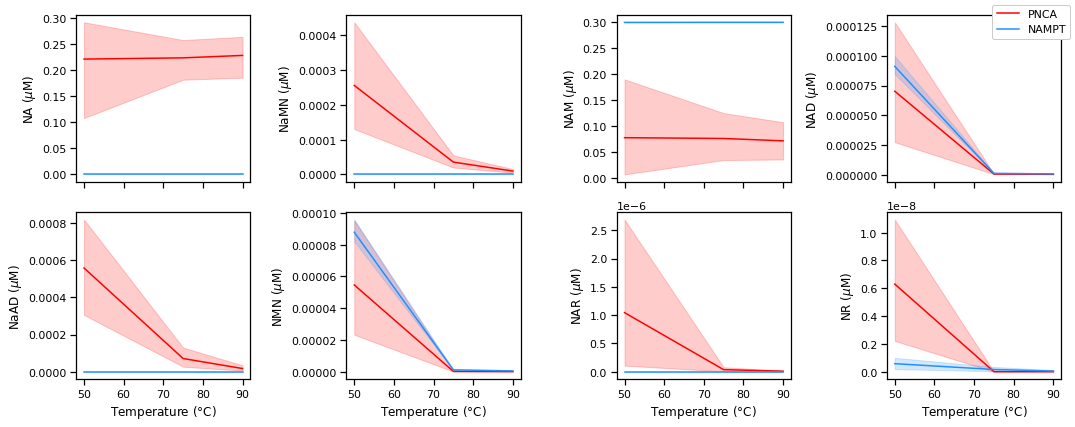

In [36]:
mconc = CF[list(CF.columns[:8])+['pathway',]]
mconc = mconc.rename(columns={i:i+' ($\mu$M)' for i in mconc.columns[:8]})
subplot_lineplot(df=mconc, layout=(2,4), figsize=(15,6), hue='pathway', sharex=True,
                filename='../../Thermophiles/paper/figures/simulatedConc_P_N.png')

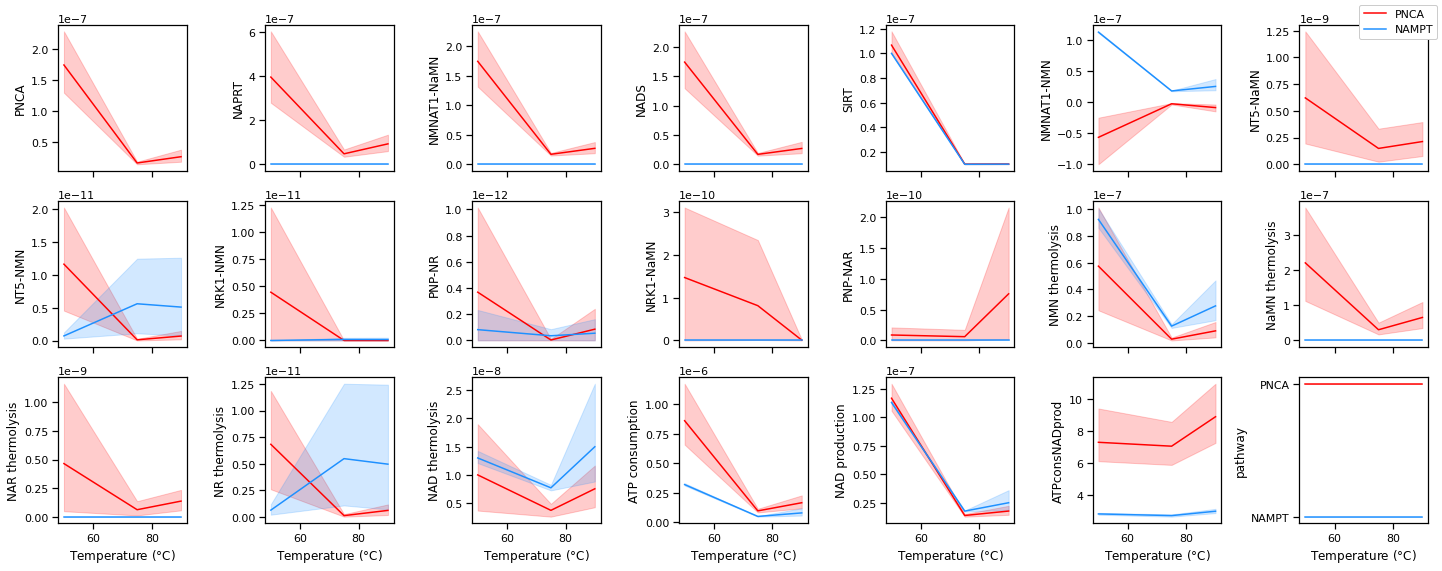

In [37]:
subplot_lineplot(df=CF[CF.columns[8:]], figsize=(20,8), layout=(3,7), hue='pathway', sharex=True,
                 filename='../../Thermophiles/paper/figures/simulatedFlux_P_N.png')

# Optimisation using fitted arrhenius parameters

In [51]:
dfATP = sim.readOptResults('./PvN_mATP/temperature_scan/results/')
dfRatio = sim.readOptResults('./PvN_ratio/temperature_scan/results/')
dfET = sim.readOptResults('./PvN_totalET/temperature_scan/results/')

In [108]:
def meltTriu(df):
    df = df.where(np.triu(np.ones(df.shape)).astype(np.bool))
    df = df.stack().reset_index()
    df.columns = ['Row','Column','Value']
    return df.set_index('Row')
#sns.heatmap(data=np.corrcoef(df3.loc[df3.ET_NAMPT<1.0].corr(), df3.loc[df3.ET_PNCA<1.0].corr()))

In [111]:
np.corrcoef(meltTriu(df3.loc[df3.ET_NAMPT<1.0].corr())['Value'], meltTriu(df3.loc[df3.ET_PNCA<1.0].corr())['Value'])

<ipython-input-108-872f90c4e2e3>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.where(np.triu(np.ones(df.shape)).astype(np.bool))
<ipython-input-108-872f90c4e2e3>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.where(np.triu(np.ones(df.shape)).astype(np.bool))


array([[1.        , 0.79955258],
       [0.79955258, 1.        ]])

df1 = sim.scan_and_optimize(parameterName='temperature', filepath_CPSmodel='../models/NAD_biosynthesis_PN_mATP_sirt.cps', 
                           foldername='./PN_sirt/', T0=30, n=50, steps=5)

In [26]:
df2 = sim.scan_and_optimize(parameterName='temperature', filepath_CPSmodel='../models/NAD_biosynthesis_PN_mATPNAD_sirt.cps', 
                           foldername='./PN_sirt/', T0=30, n=50, steps=5)

In [12]:
#fig, ax = plt.subplots(figsize=(8,6))
#sns.set_palette("Set2")
#lp = sns.lineplot(ax=ax, data=drate.set_index(drate.columns[0]).drop(['NiA', 'Nam', 'ATP'], axis=1), 
#                  dashes=False, markers=True)#, palette=['#3a3a3a', '#7f7f7f', '#7f8eb7', '#94bb8b', '#9c7762'])
#lp.set(xlabel='Temperature (C)', ylabel='Degradation rate (%/min)')
#lp.get_figure().savefig('../paper/figures/degration_rates.png', dpi=300)

## Figure: ATP consumption per NAD production at different temperature

In [6]:
model = '../NAD_thermo_model/parameter_optimization/NAD_optimization_template_NADA.cps'
model1 = '../NAD_thermo_model/parameter_optimization/NAD_optimization_template_NAMPT.cps'

In [7]:
cc = pd.read_csv('../NAD_thermo_model/parameter_optimization/CC_NADA1.txt', delimiter='\t')
cc = cc.rename(columns={'Unnamed: 0': 'metabolites'}).set_index('metabolites')
CC_NADA = cc.T.rename(columns={np.nan:'NA'}).T

FileNotFoundError: [Errno 2] No such file or directory: '../NAD_thermo_model/parameter_optimization/CC_NADA1.txt'

In [108]:
CC_NADA1 = CC_NADA.rename(columns={i:i.strip('()') for i in CC_NADA.columns})
CC_NADA1 = CC_NADA1.rename(columns={'NADA':'PNCA', 'SIRT[NADA]': 'SIRT', "'Summation Error'": 'Summation Error'})

In [112]:
thermolysis = list(CC_NADA1.filter(like='thermolysis').columns)

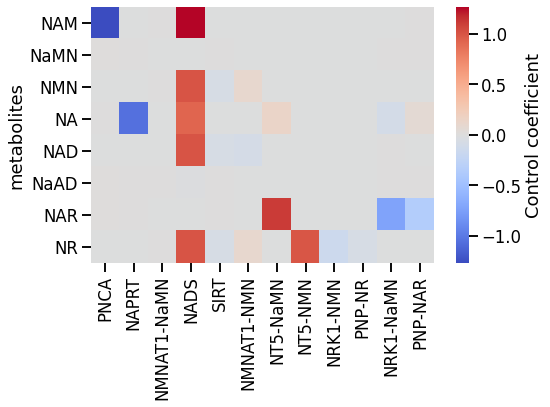

In [113]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data=CC_NADA1.drop(['NAMPT', 'Summation Error'] + thermolysis, axis=1), 
            cmap='coolwarm', center=0.0, xticklabels=True, ax=ax, cbar_kws={'label': 'Control coefficient'});
plt.tight_layout()
fig.savefig('../paper/figures/conc_control_coefficient_NADA.png', dpi=300)

In [114]:
cc = pd.read_csv('../NAD_thermo_model/parameter_optimization/CC_NAMPT1.txt', delimiter='\t')
cc = cc.rename(columns={'Unnamed: 0': 'metabolites'}).set_index('metabolites')
CC_NAMPT = cc.T.rename(columns={np.nan:'NA'}).T
CC_NAMPT = CC_NAMPT.rename(columns={i:i.strip('()') for i in CC_NAMPT.columns})

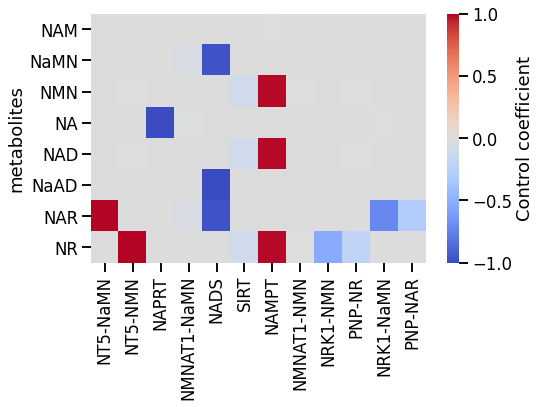

In [115]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data=CC_NAMPT.drop(['NADA', "'Summation Error'"] + thermolysis, axis=1), cmap='coolwarm', 
                                center=0.0, xticklabels=True, ax=ax, cbar_kws={'label': 'Control coefficient'});
plt.tight_layout()
fig.savefig('../paper/figures/conc_control_coefficient_NAMPT.png', dpi=300)

## Comparison of ATP consumption per NAD production via PNCA and NAMPT pathway

In [13]:
Conc, Flux = sim.scanTemp(filepath_CPSmodel='../../Thermophiles/NAD_thermo_model/parameter_optimization/NAD_optimization_template.cps', foldername='./', T0=30, steps=20)
#Conc.T.reset_index().rename(columns={'index':'Temperature'}).to_csv('../data/simulation/temp_scan_NADAvsNAMPT_conc.csv', sep='\t', index=False)
#Flux.T.reset_index().rename(columns={'index':'Temperature'}).to_csv('../data/simulation/temp_scan_NADAvsNAMPT_flux.csv', sep='\t', index=False)

In [8]:
# read simulated data
C = pd.read_csv('../data/simulation/temp_scan_NADAvsNAMPT_conc.csv', delimiter='\t')
F = pd.read_csv('../data/simulation/temp_scan_NADAvsNAMPT_flux.csv', delimiter='\t')

C = C.set_index('Temperature')
F = F.set_index('Temperature')

In [203]:
dfC11 = sim.NADAvsNAMPT(dfC)
dfF11 = sim.NADAvsNAMPT(dfF)
cols = {}
for i in dfF.columns:
    if '[NADA]' in i:
        cols[i] = i[:-6] + '{NADA}'
    elif '[0]' in i:
        cols[i] = i[:-3] + '{NAMPT}'
    elif '[NAMPT]' in i:
        cols[i] = i[:-7] + '{NAMPT}'
    else:
        cols[i] = i + '{NADA}'
        
dfF11 = dfF.rename(columns=cols)

In [9]:
def subplot_lineplot(df, layout: tuple, figsize: tuple, xlabel='Temp (C)', color='blue', **kwargs):
    if 'sharex' in kwargs:
        sharex = kwargs['sharex']
    else:
        sharex = False
    col = ['NAD (mM)', 'NMN (mM)', 'NAR (mM)', 'NA (mM)', 'NR (mM)', 'NAM (mM)', 'NaMN (mM)', 'NaAD (mM)']    
    ncol = ['NAM (mM)', 'NAD (mM)', 'NMN (mM)']
    nM = ['NR (mM)', 'NA (mM)']
    fig, ax = plt.subplots(layout[0], layout[1], figsize=figsize, sharex=sharex)#, sharey=True)
    count = 0
    # while count < len(df.columns):
    for i in range(layout[0]):
        for j in range(layout[1]):
            if count < len(df.columns):
                lp = sns.lineplot(data=df[col[count]], ax=ax[i, j], color=color)
                lp.set(xlabel=xlabel, ylabel=col[count][:-3] + '$\mu$M)')
                if col[count] in ncol:
                    lp.set(ylim=(0, 5))
                elif col[count] == 'NAR (mM)':
                    lp.set(ylim=(0, 1))
                elif col[count] == 'NR (mM)':
                    lp.set(ylim=(-0.005, 0.1))
                elif col[count] in ['NaMN (mM)', 'NaAD (mM)']:
                    lp.set(ylim=(0, 300))
                elif col[count] == 'NA (mM)':
                    lp.set(ylim=(0.05, 0.1))
                else:
                    pass
                #plt.ticklabel_format(axis="y", limits=(0,100))
                if 'rotation' in kwargs:
                    for item in lp.get_xticklabels():
                        item.set_rotation(kwargs['rotation'])
                    # lp.set_xticklabels(rotation=kwargs['rotation'])
                count += 1
            else:
                break

    emptyaxes = int(layout[0] * layout[1] - len(df.columns))
    for e in range(emptyaxes):
        if e >= layout[1]:
            fig.delaxes(ax[layout[0] - 2, -(1 + (e - layout[1]))])
        else:
            fig.delaxes(ax[layout[0] - 1, -(1 + e)])

    plt.tight_layout()
    if 'filename' in kwargs:
        fig.savefig(kwargs['filename'], dpi=300)
    return plt.show()

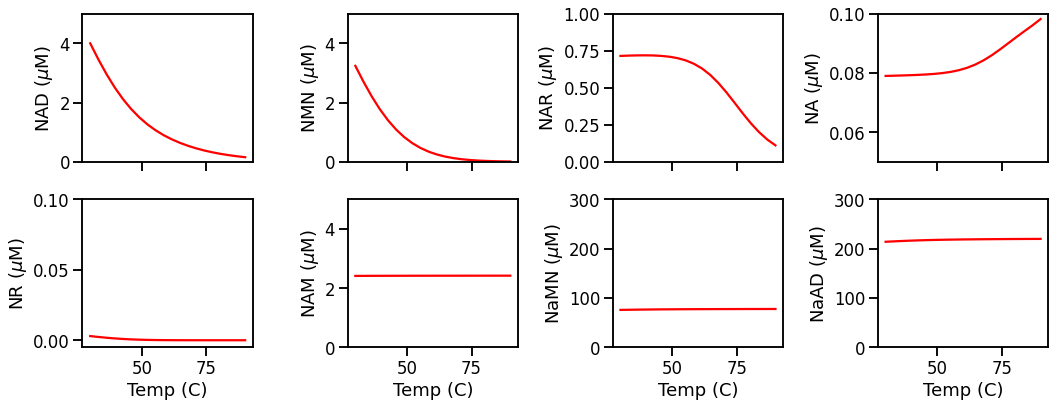

In [207]:
subplot_lineplot(df=ndf * 1e3, layout=(2, 4), figsize=(15,6), color='#FF0000', sharex=True, filename='../paper/figures/NADA_conc.png')

In [16]:
F = Flux
F['ATP consumption(NADA)'] = F.NAPRT + 2*F.NADS + F['NMNAT1-NaMN'] + F.NAMPT + F['NMNAT1-NMN'] + F['NRK1-NMN'] + F['NRK1-NaMN']
F['NAD production(NADA)'] = F.NADS + F['NMNAT1-NMN']
F['ATP consumption(NAMPT)'] = F['NAPRT[NAMPT]'] + 2*F['NADS[NAMPT]'] + F['NMNAT1-NaMN[0]'] + F['NAMPT[NAMPT]'] + F['NMNAT1-NMN[0]'] + F['NRK1-NMN[0]'] + F['NRK1-NaMN[0]']
F['NAD production(NAMPT)'] = F['NADS[NAMPT]'] + F['NMNAT1-NMN[0]']

F['PNCA'] = F['ATP consumption(NADA)']/F['NAD production(NADA)']
F['NAMPT'] = F['ATP consumption(NAMPT)']/F['NAD production(NAMPT)']

#F = F.set_index('temperature')

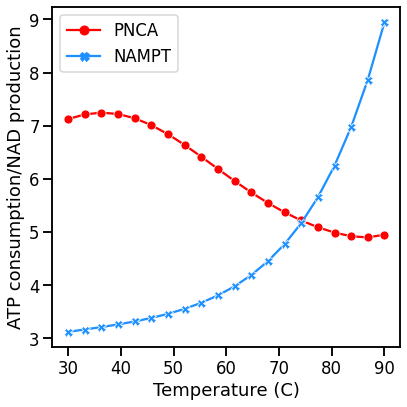

In [17]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(6,6))
lp = sns.lineplot(data=F[['PNCA', 'NAMPT']], dashes=False, markers=True, ax=ax, palette=['#FF0000', '#1E90FF'])
lp.set(xlabel='Temperature (C)', ylabel='ATP consumption/NAD production')
plt.tight_layout()
#lp.get_figure().savefig('../paper/figures/ATPconsumption_NADproduction.png', dpi=300)

## Figure: K. Olearia expression profile

In [3]:
exp = pd.read_csv('../expression_data/K.olearia/060053-8.csv')
genes = pd.read_csv('../expression_data/K.olearia/gene_mapping_Kole.csv')

In [4]:
Kole = sim.Kole_exp(exp, genes)

[Text(0.5, 0, 'Temperature (C)'), Text(0, 0.5, 'Gene expression (RPKM)')]

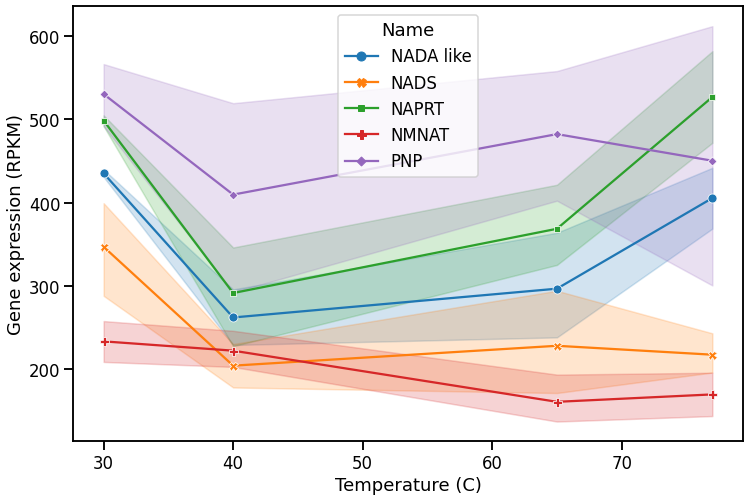

In [121]:
fig, ax = plt.subplots(figsize=(12,8))
#lp = sns.lineplot(ax=ax, data=Kole.T[Kole.T.index>=30].drop('NT5', axis=1), dashes=False, markers=True)
lp = sns.lineplot(ax=ax, data=Kole.T[['NADA like', 'NADS', 'NAPRT', 'NMNAT', 'PNP']][Kole.T.index>=30], 
                  dashes=False, markers=True,)
                 #palette=['#FF0000', '#FFA500', '#2E8B57', '#8B4513'])
lp.set(xlabel='Temperature (C)', ylabel='Gene expression (RPKM)')
#lp.get_figure().savefig('results/expression_Kole.png', dpi=300)

In [15]:
temp = pd.read_csv('../Temperature_degradation_NAD_precursors.csv')
temp = temp.set_index('Compound')

In [10]:
tempT = temp.T
tempT = tempT.rename(columns={np.nan: 'NiA'})
temp = tempT.T.reset_index()

In [48]:
scanTemp_and_optimize(filepath_CPSmodel='../NAD_thermo_model/parameter_optimization/NAD_optimization_template_NAD_conc_NADA.cps', foldername='../NAD_thermo_model/parameter_optimization/NADAmodel/')

## Figure: Maximise NAD concentration

In [116]:
dfN = pd.read_csv('../data/simulation/temp_scan_concNAD.csv', delimiter='\t')

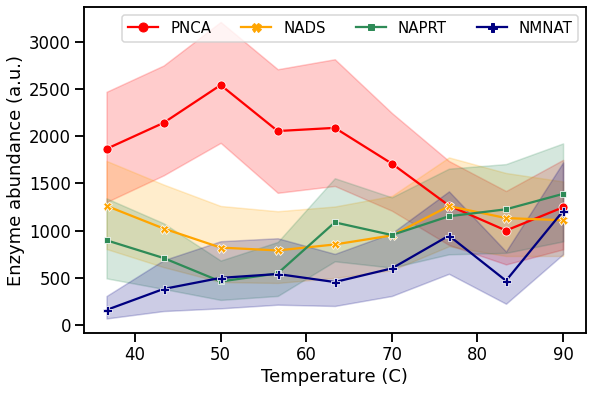

In [117]:
plot.optAbundance(df=dfN.set_index('Temp').rename(columns={'NADA':'PNCA', 'NMNAT1': 'NMNAT'}), xlabel='Temperature (C)', 
                  ylabel='Enzyme abundance (a.u.)', palette=['#FF0000', '#FFA500', '#2E8B57', '#000080'],) 
                  #filename='Optimized_expression_NADconc.png')

In [118]:
OptValues = dfN.drop('Sol', axis=1)
Optdf = OptValues.rename(columns={'Temp':'temperature', 'NADA':'ET_NADA', 'NADS':'ET_NADS', 'NAPRT':'ET_NAPRT', 'NMNAT1':'ET_NMNAT1'})

In [119]:
C, F = sim.getsteadystates('../NAD_thermo_model/parameter_optimization/NAD_optimization_template_NAD_conc1.cps', Optdf)

In [124]:
# save results as csv
C.to_csv('../data/simulation/optimized_conc_concNAD.csv', sep='\t')
F.to_csv('../data/simulation/optimized_flux_concNAD.csv', sep='\t')

In [17]:
# Optimized flux
F = pd.read_csv('../data/simulation/optimized_flux_concNAD.csv', delimiter='\t')
F = F.set_index('Temperature')
# Optimized conc
C = pd.read_csv('../data/simulation/optimized_conc_concNAD.csv', delimiter='\t')
C = C.set_index('Temperature')

In [25]:
def filterNADA(C):
    dfC = C.filter(like='{NADA}')
    dfC = dfC.loc[:, (dfC != dfC.iloc[0]).any()]
    dfC = dfC.rename(columns={i:i[:-6]+' (mM)' for i in dfC.columns})
    return dfC

In [15]:
def subplot_lineplot1(df, layout: tuple, figsize: tuple, xlabel='Temp (C)', color='blue', **kwargs):
    if 'sharex' in kwargs:
        sharex = kwargs['sharex']
    else:
        sharex = False
    col = ['NAD (mM)', 'NMN (mM)', 'NAR (mM)', 'NA (mM)', 'NR (mM)', 'NAM (mM)', 'NaMN (mM)', 'NaAD (mM)']    
    ncol = ['NAM (mM)', 'NAD (mM)', 'NMN (mM)']
    nM = ['NR (mM)', 'NA (mM)']
    fig, ax = plt.subplots(layout[0], layout[1], figsize=figsize, sharex=sharex)#, sharey=True)
    count = 0
    # while count < len(df.columns):
    for i in range(layout[0]):
        for j in range(layout[1]):
            if count < len(df.columns):
                lp = sns.lineplot(data=df[col[count]], ax=ax[i, j], color=color)
                lp.set(xlabel=xlabel, ylabel=col[count][:-3] + '$\mu$M)')
                if 'ylims' in kwargs:
                    if col[count] in kwargs['ylims'].keys():
                        lp.set(ylim=kwargs['ylims'][col[count]])
                else:
                    pass
                if 'rotation' in kwargs:
                    for item in lp.get_xticklabels():
                        item.set_rotation(kwargs['rotation'])
                    # lp.set_xticklabels(rotation=kwargs['rotation'])
                count += 1
            else:
                break

    emptyaxes = int(layout[0] * layout[1] - len(df.columns))
    for e in range(emptyaxes):
        if e >= layout[1]:
            fig.delaxes(ax[layout[0] - 2, -(1 + (e - layout[1]))])
        else:
            fig.delaxes(ax[layout[0] - 1, -(1 + e)])

    plt.tight_layout()
    if 'filename' in kwargs:
        fig.savefig(kwargs['filename'], dpi=300)
    return plt.show()

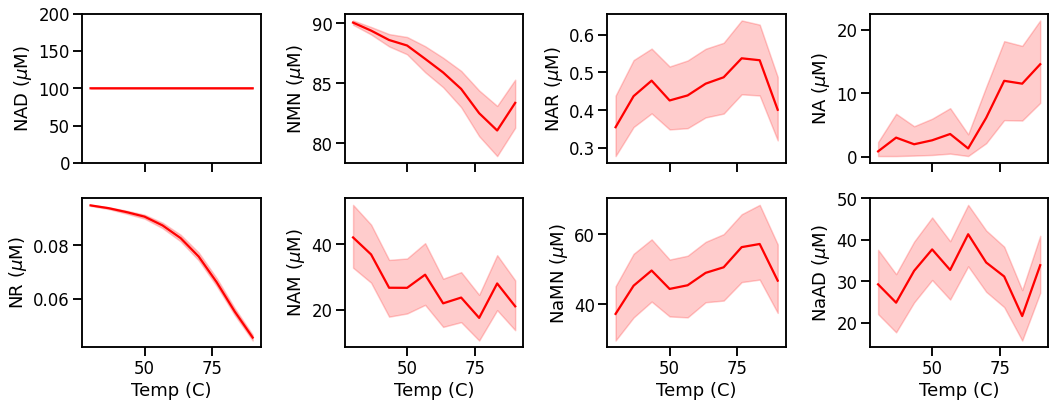

In [131]:
subplot_lineplot1(dfC_* 1e3, layout=(2, 4), figsize=(15,6), color='#FF0000', sharex=True,
                 ylims={'NAD (mM)': (0, 200)}, filename='../paper/figures/concentration_concNAD.png')

In [19]:
def calculateATPconsFlux(F):
    F['ATP consumption(NADA)'] = F.NAPRT + 2*F.NADS + F['NMNAT1-NaMN'] + F.NAMPT + F['NMNAT1-NMN'] + F['NRK1-NMN'] + F['NRK1-NaMN']
    F['NAD production(NADA)'] = F.NADS + F['NMNAT1-NMN']
    F['ATP consumption(NAMPT)'] = F['NAPRT[NAMPT]'] + 2*F['NADS[NAMPT]'] + F['NMNAT1-NaMN[0]'] + F['NAMPT[NAMPT]'] + F['NMNAT1-NMN[0]'] + F['NRK1-NMN[0]'] + F['NRK1-NaMN[0]']
    F['NAD production(NAMPT)'] = F['NADS[NAMPT]'] + F['NMNAT1-NMN[0]']

    F['PNCA'] = F['ATP consumption(NADA)']/F['NAD production(NADA)']
    F['NAMPT'] = F['ATP consumption(NAMPT)']/F['NAD production(NAMPT)']
    return F

In [53]:
F_concNAD = calculateATPconsFlux(F)

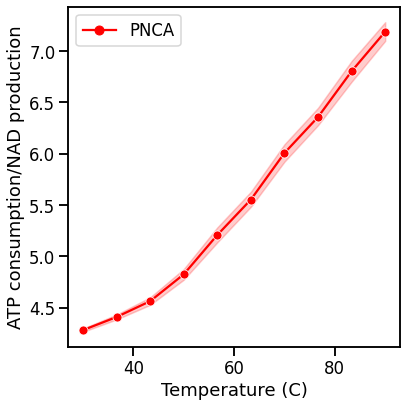

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
lp = sns.lineplot(data=F[['PNCA',]], dashes=False, markers=True, ax=ax, palette=['#FF0000', ])
lp.set(xlabel='Temperature (C)', ylabel='ATP consumption/NAD production')
plt.tight_layout()
lp.get_figure().savefig('../paper/figures/ATPconsumption_NADproduction_concNAD.png', dpi=300)

<AxesSubplot:xlabel='Temperature'>

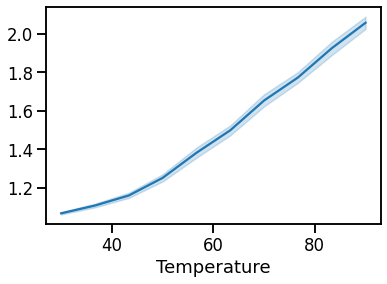

In [8]:
sns.lineplot(data=F['NADA']/(F['SIRT[NADA]'] + F['NAD-dependent-Ligase[NADA]'] + F['NAD thermolysis']))

[Text(0.5, 0, 'Temperature (C)'), Text(0, 0.5, 'ATP consumption/SIRT')]

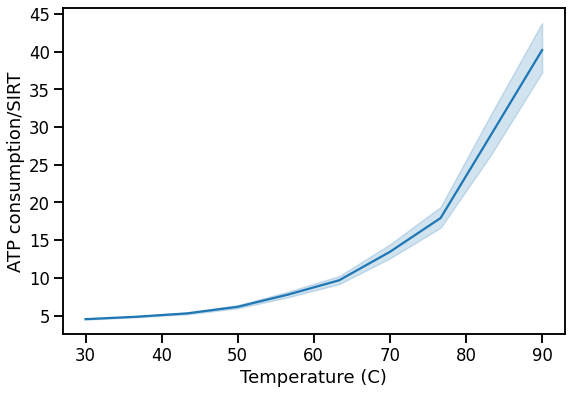

In [9]:
fig, ax = plt.subplots(figsize=(9,6))
lp = sns.lineplot(data=F['ATP consumption(NADA)']/F['SIRT[NADA]'], markers=True, ax=ax)
lp.set(xlabel='Temperature (C)', ylabel='ATP consumption/SIRT')
#lp.get_figure().savefig('results/ATPcons_SIRT_NADA.png', dpi=300)

In [4]:
#OptValues = pd.read_csv('../NAD_thermo_model/parameter_optimization/temp_scan/results/Optvalues_temp.csv', delimiter='\t')
OptValues = pd.read_csv('../NAD_thermo_model/parameter_optimization/temp_scan2/results/Optvalues_temp2.csv', delimiter='\t')
OptValues = OptValues.drop('Sol', axis=1)
Optdf = OptValues.rename(columns={'Temp':'temperature', 'NADA':'ET_NADA', 'NADS':'ET_NADS', 'NAPRT':'ET_NAPRT', 'NMNAT1':'ET_NMNAT1'})
    

In [5]:
Optdf

,temperature,ET_NADA,ET_NADS,ET_NAPRT,ET_NMNAT1,enzyme_activity_scaling
0,0.0,4.233922,816.781951,1.580628,0.309607,0.000003
1,0.0,9.794790,51.092984,47.474829,0.390352,0.000002
2,0.0,2.949075,901.286928,2.135806,325.589133,6.615508
3,0.0,3.087752,85.243385,33.317310,2.780222,0.000016
4,0.0,198.629386,60.483969,16.637104,0.430052,0.189262
...,...,...,...,...,...,...
1595,90.0,3.326923,181.725284,15.241434,0.757456,0.000401
1596,90.0,3.023340,102.449105,2.720242,61.173830,0.003678
1597,90.0,90.559326,66.493396,6.187027,0.572827,0.000016
1598,90.0,536.081586,52.971638,16.935001,0.837569,0.000025


In [ ]:
CC, FC, E = performMCA(Optdf=Optdf, filepath_CPSmodel='../NAD_thermo_model/parameter_optimization/NAD_optimization_template_NAD_conc1.cps')

Scaled Concentration Control Coefficients
Size of the matrix is: 16 rows x 41 columns
Scaled Flux Control Coefficients
Size of the matrix is: 40 rows x 41 columns
Scaled Elasticities
Size of the matrix is: 40 rows x 16 columns
Scaled Concentration Control Coefficients
Size of the matrix is: 16 rows x 41 columns
Scaled Flux Control Coefficients
Size of the matrix is: 40 rows x 41 columns
Scaled Elasticities
Size of the matrix is: 40 rows x 16 columns


### Results: Optimisation results from minimisation of ATP consumption

In [56]:
dfA = pd.read_csv('../NAD_thermo_model/parameter_optimization/temp_scan_minATP/temp_scan_1.csv', delimiter='\t')

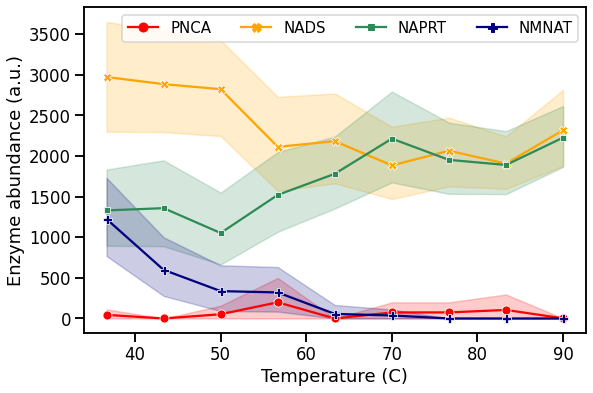

In [115]:
plot.optAbundance(df=dfA.set_index('Temp').rename(columns={'NADA':'PNCA', 'NMNAT1': 'NMNAT'}), xlabel='Temperature (C)', 
                  ylabel='Enzyme abundance (a.u.)', palette=['#FF0000', '#FFA500', '#2E8B57', '#000080'],
                  filename='Optimized_expression_minATP.png')

In [24]:
OptValues = dfA.drop('Sol', axis=1)
Optdf = OptValues.rename(columns={'Temp':'temperature', 'NADA':'ET_NADA', 'NADS':'ET_NADS', 'NAPRT':'ET_NAPRT', 'NMNAT1':'ET_NMNAT1'})

In [ ]:
model = '../NAD_thermo_model/parameter_optimization/NAD_optimization_template_min_ATP1.cps'
C, F = sim.getsteadystates(filepath_CPSmodel=model, Optdf=Optdf)
C.to_csv('../NAD_thermo_model/parameter_optimization/temp_scan_minATP/concentration_minATP.csv', sep='\t')
F.to_csv('../NAD_thermo_model/parameter_optimization/temp_scan_minATP/fluxes_minATP.csv', sep='\t')

In [19]:
C = pd.read_csv('../NAD_thermo_model/parameter_optimization/temp_scan_minATP/conc_minATP.csv', delimiter='\t')
F = pd.read_csv('../NAD_thermo_model/parameter_optimization/temp_scan_minATP/flux_minATP.csv', delimiter='\t')
C = C.set_index('Temperature')
F = F.set_index('Temperature')

In [20]:
dfC = C.filter(like='{NADA}')
dfC_ = dfC.loc[:, (dfC != dfC.iloc[0]).any()]
dfC_minATP = dfC_.rename(columns={i:i[:-6]+' (mM)' for i in dfC_.columns})

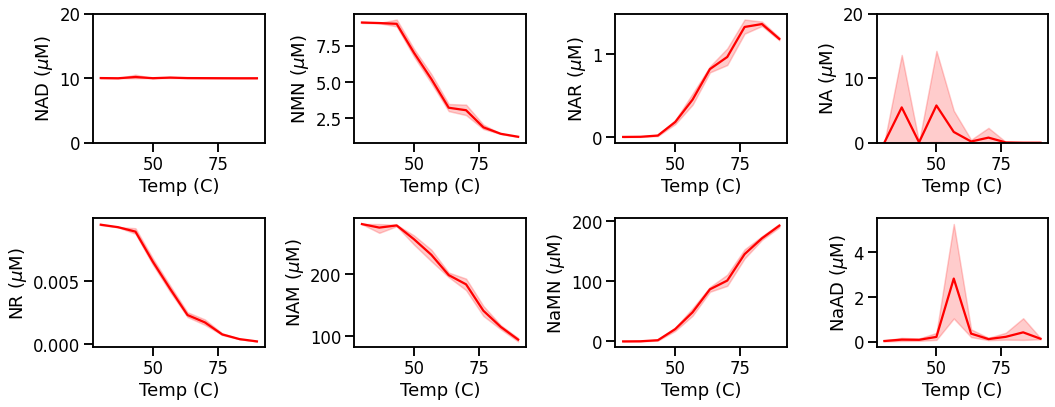

In [18]:
subplot_lineplot1(df=dfC_*1e3, layout=(2, 4), figsize=(15,6), color='#FF0000', 
                  ylims={'NAD (mM)': (0, 20), 'NA (mM)': (0, 20)},
                  filename='../paper/figures/concentration_minATP.png')

In [56]:
F_minATP = calculateATPconsFlux(F)

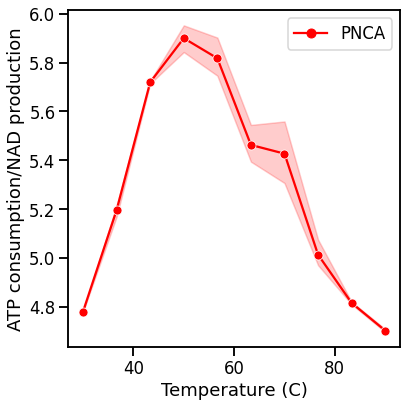

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
lp = sns.lineplot(data=F[['PNCA',]], dashes=False, markers=True, ax=ax, palette=['#FF0000', ])
lp.set(xlabel='Temperature (C)', ylabel='ATP consumption/NAD production')
plt.tight_layout()
lp.get_figure().savefig('../paper/figures/ATPconsumption_NADproduction_minATP.png', dpi=300)

### Results: Optimisation results from minimisation of ATP consumption per NAD production

In [35]:
dfAN = pd.read_csv('../NAD_thermo_model/parameter_optimization/ATPcons/temp_scan.csv', delimiter='\t')

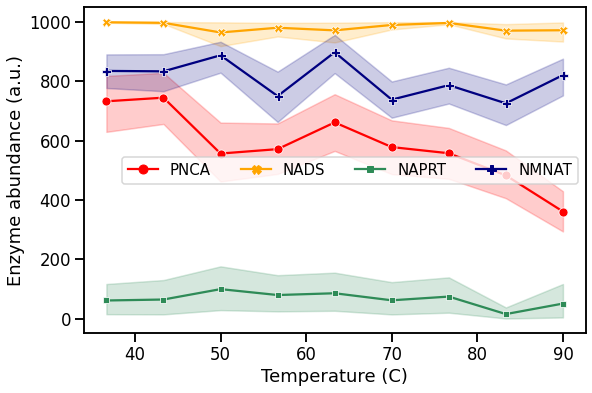

In [36]:
plot.optAbundance(df=dfAN.set_index('Temp').rename(columns={'NADA':'PNCA', 'NMNAT1': 'NMNAT'}), xlabel='Temperature (C)', 
                  ylabel='Enzyme abundance (a.u.)', palette=['#FF0000', '#FFA500', '#2E8B57', '#000080'],)
                  #filename='Optimized_expression_ATPcons_NADprod.png')

In [39]:
OptValues = dfAN.drop('Sol', axis=1)
Optdf = OptValues.rename(columns={'Temp':'temperature', 'NADA':'ET_NADA', 'NADS':'ET_NADS', 
                                  'NAPRT':'ET_NAPRT', 'NMNAT1':'ET_NMNAT1'})

In [42]:
C, F = sim.getsteadystates(filepath_CPSmodel='../NAD_thermo_model/parameter_optimization/NAD_optimization_template_NAD_conc1.cps',
                           Optdf=Optdf)

In [21]:
#C.to_csv('../NAD_thermo_model/parameter_optimization/ATPcons/concentration_ATPcons.csv')
#F.to_csv('../NAD_thermo_model/parameter_optimization/ATPcons/fluxes_ATPcons.csv')

C = pd.read_csv('../data/simulation/optimized_conc_ATPconc.csv', delimiter='\t')
F = pd.read_csv('../data/simulation/optimized_flux_ATPconc.csv', delimiter='\t')
C = C.set_index('Temperature')
F = F.set_index('Temperature')

In [159]:
def cf(dF):
    dF['ATP consumption(NADA)'] = dF.NAPRT + 2*dF.NADS + dF['NMNAT1-NaMN'] + dF.NAMPT + dF['NMNAT1-NMN'] + dF['NRK1-NMN'] + dF['NRK1-NaMN']
    dF['NAD production(NADA)'] = dF.NADS + dF['NMNAT1-NMN']
    dF['PNCA'] = dF['ATP consumption(NADA)']/dF['NAD production(NADA)']
    return dF

In [161]:
F2 = cf(F)
F2

,NADA,NAPRT,NMNAT1-NaMN,NADS,SIRT[NADA],NAMPT,NMNAT1-NMN,NT5-NaMN,NT5-NMN,NRK1-NMN,...,NAR thermolysis[0],NR thermolysis[0],NAD thermolysis[NAMPT],NMND[NADA],NMND[NAMPT],NAD-dependent-Ligase[NADA],NAD-dependent-Ligase[NAMPT],ATP consumption(NADA),NAD production(NADA),PNCA
Temperature,,,,,,,,,,,,,,,,,,,,,
63.333333,5.605934e-07,5.605994e-07,5.605934e-07,5.605934e-07,5.067710e-08,0.0,-2.884782e-07,2.020884e-11,1.483020e-09,7.193205e-10,...,4.595071e-40,1.175646e-11,5.466907e-09,0.0,0.0,0.0,0.0,0.000002,2.721153e-07,7.183114
63.333333,3.149944e-06,3.149978e-06,3.149944e-06,3.149944e-06,7.292338e-07,0.0,-1.369471e-06,1.159355e-10,6.997919e-09,3.383184e-09,...,-5.239300e-39,1.175645e-11,5.466911e-09,0.0,0.0,0.0,0.0,0.000011,1.780473e-06,6.309449
63.333333,3.150010e-06,3.150044e-06,3.150010e-06,3.150010e-06,7.292315e-07,0.0,-1.369509e-06,1.159381e-10,6.998116e-09,3.383278e-09,...,6.301989e-43,1.175645e-11,5.466911e-09,0.0,0.0,0.0,0.0,0.000011,1.780500e-06,6.309479
63.333333,3.151569e-06,3.151603e-06,3.151569e-06,3.151569e-06,7.294108e-07,0.0,-1.370290e-06,1.159977e-10,7.002074e-09,3.385184e-09,...,6.734612e-41,1.175645e-11,5.466911e-09,0.0,0.0,0.0,0.0,0.000011,1.781279e-06,6.309785
63.333333,3.151137e-06,3.151171e-06,3.151137e-06,3.151137e-06,7.293638e-07,0.0,-1.370072e-06,1.160249e-10,7.000970e-09,3.384652e-09,...,-4.144341e-41,1.175645e-11,5.466911e-09,0.0,0.0,0.0,0.0,0.000011,1.781065e-06,6.309696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50.000000,2.318934e-06,2.318959e-06,2.318934e-06,2.318934e-06,7.219135e-07,0.0,-8.831685e-07,8.887054e-11,1.323572e-08,8.269340e-09,...,3.046632e-38,7.681744e-12,3.475261e-09,0.0,0.0,0.0,0.0,0.000008,1.435765e-06,5.851183
50.000000,2.314531e-06,2.314556e-06,2.314531e-06,2.314531e-06,7.209063e-07,0.0,-8.812908e-07,8.846988e-11,1.320812e-08,8.252271e-09,...,1.182440e-38,7.681743e-12,3.475261e-09,0.0,0.0,0.0,0.0,0.000008,1.433240e-06,5.850502
50.000000,3.074593e-06,3.074628e-06,3.074593e-06,3.074593e-06,7.721287e-07,0.0,-1.273277e-06,1.218962e-10,1.892038e-08,1.176996e-08,...,-2.119021e-40,7.681744e-12,3.475261e-09,0.0,0.0,0.0,0.0,0.000011,1.801316e-06,6.127180


<AxesSubplot:xlabel='Temperature', ylabel='PNCA'>

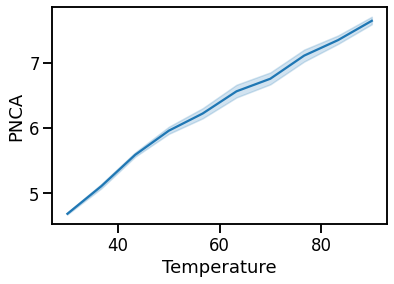

In [150]:
sns.lineplot(data=F['PNCA'], dashes=False, markers=True)

In [22]:
dfC = C.filter(like='{NADA}')
dfC_ = dfC.loc[:, (dfC != dfC.iloc[0]).any()]
dfC_ATPconsNADprod = dfC_.rename(columns={i:i[:-6]+' (mM)' for i in dfC_.columns})

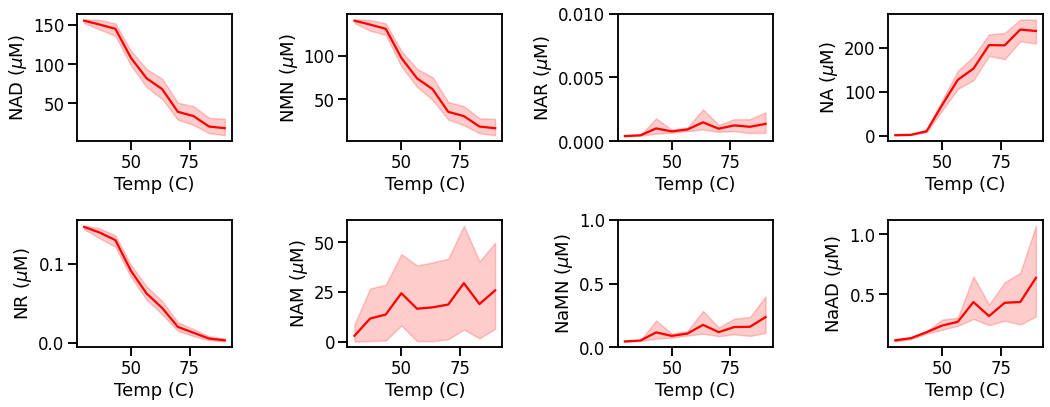

In [26]:
subplot_lineplot1(df=dfC_*1e3, layout=(2, 4), figsize=(15,6), color='#FF0000', 
                  ylims={'NAR (mM)': (0, 0.01), 'NaMN (mM)': (0, 1)},
                  filename='../paper/figures/concentration_ATPcons_NADprod.png')

In [26]:
F_ATPconsNADprod = calculateATPconsFlux(F)


NameError: name 'calculateATPconsFlux' is not defined

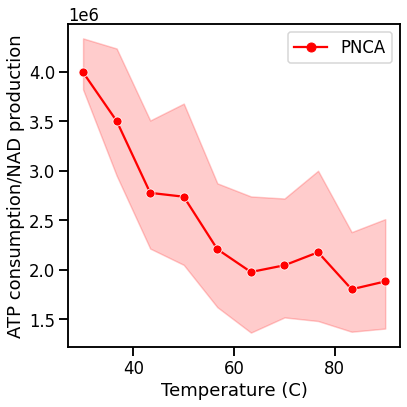

In [146]:
fig, ax = plt.subplots(figsize=(6,6))
lp = sns.lineplot(data=F_ATPconsNADprod[['PNCA',]], dashes=False, markers=True, ax=ax, palette=['#FF0000', ])
lp.set(xlabel='Temperature (C)', ylabel='ATP consumption/NAD production')
plt.tight_layout()
#lp.get_figure().savefig('../paper/figures/ATPconsumption_NADproduction_ATPcons_NADprod.png', dpi=300)

In [145]:
F_ATPconsNADprod = calculateATPconsFlux(F)

### Compare optimisation results

In [27]:
# Optimized conc
C = pd.read_csv('../data/simulation/optimized_conc_concNAD.csv', delimiter='\t')
C = C.set_index('Temperature')
dfC_concNAD = filterNADA(C)

C = pd.read_csv('../NAD_thermo_model/parameter_optimization/temp_scan_minATP/conc_minATP.csv', delimiter='\t')
C = C.set_index('Temperature')
dfC_minATP = filterNADA(C)

C = pd.read_csv('../data/simulation/optimized_conc_ATPconc.csv', delimiter='\t')
C = C.set_index('Temperature')
dfC_ATPconsNADprod = filterNADA(C)

In [28]:
dfC_concNAD.loc[:, 'optimization'] = 'maxNAD'
dfC_minATP.loc[:, 'optimization'] = 'minATP'
dfC_ATPconsNADprod.loc[:, 'optimization'] = 'ATPcons/NADprod'
df1 = dfC_concNAD.append(dfC_minATP).append(dfC_ATPconsNADprod)

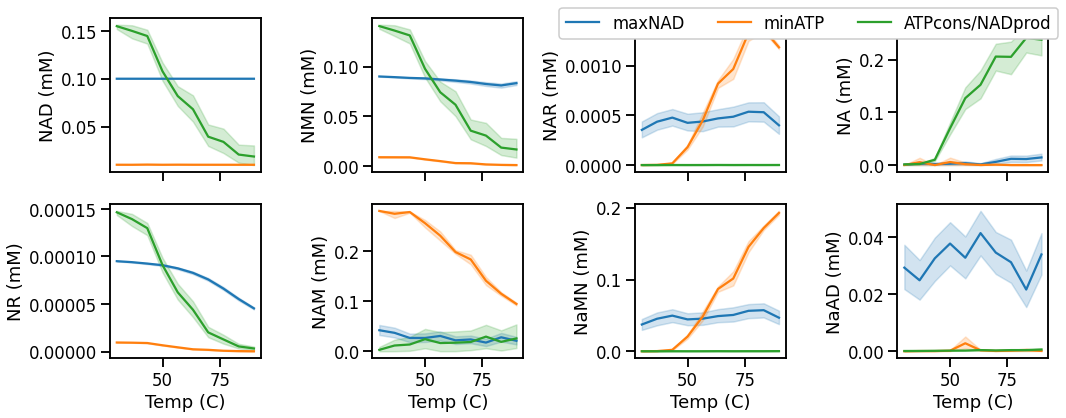

In [31]:
subplot_lineplot2(df=df1, layout=(2,4), figsize=(15,6), hue='optimization', yunit='(mM)', 
                  filename='../paper/figures/concentration_optimised.png')

In [8]:
F_concNAD.loc[:, 'optimization'] = 'maxNAD'
F_minATP.loc[:, 'optimization'] = 'minATP'
F2.loc[:, 'optimization'] = 'ATPconsNADprod'
F1 = F_concNAD.append(F_minATP).append(F2) 

NameError: name 'F_concNAD' is not defined

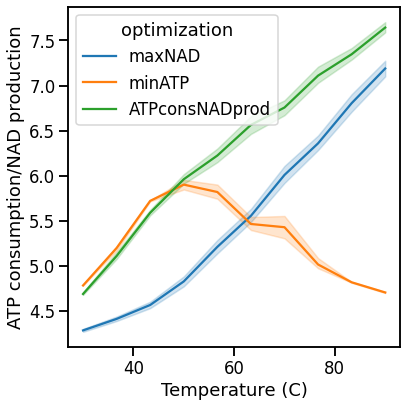

In [182]:
fig, ax = plt.subplots(figsize=(6,6))
lp = sns.lineplot(data=F1, x='Temperature', y='PNCA', hue='optimization', 
                  dashes=False, markers=True, ax=ax, color='red')
lp.set(xlabel='Temperature (C)', ylabel='ATP consumption/NAD production')
plt.tight_layout()
lp.get_figure().savefig('../paper/figures/ATPconsumption_NADproduction_1.png', dpi=300)